In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.model_selection import train_test_split

# About the Data
|      **Feature Name**      |               **Description**               |
|:--------------------------:|:-------------------------------------------:|
| person_age                 | Age                                         |
| person_income              | Annual Income                               |
| person_home_ownership      | Home ownership                              |
| person_emp_length          | Employment length (in years)                |
| loan_intent                | Loan intent                                 |
| loan_grade                 | Loan grade                                  |
| loan_amnt                  | Loan amount                                 |
| loan_int_rate              | Interest rate                               |
| loan_status                | Loan status (0 is non default 1 is default) |
| loan_percent_income        | Percent income                              |
| cb_person_default_on_file  | Historical default                          |
| cb_preson_cred_hist_length | Credit history length                       |

In [2]:
df = pd.read_csv("../data/raw/credit_risk_dataset.csv")
display(df.head())
display(df.info())
display(df.describe())

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

# Exploratory Data Analysis

## Univariate Analysis

### Target Proportion

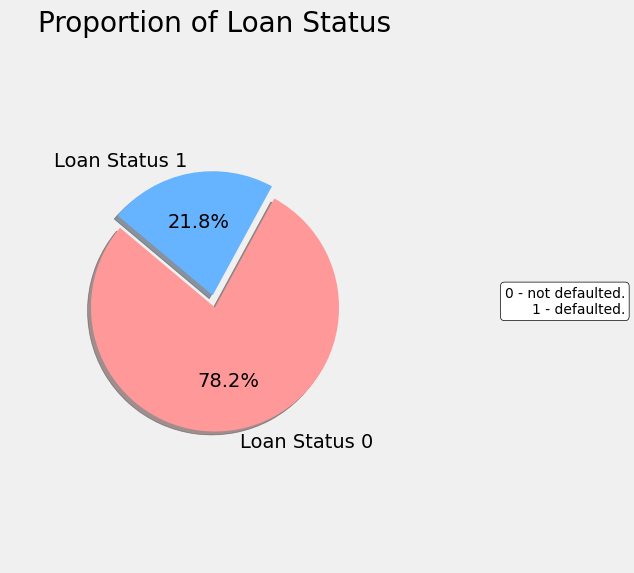

In [6]:
plt.style.use('fivethirtyeight')

# Count the values of "loan_status"
loan_status_counts = df["loan_status"].value_counts()

# Create labels and sizes for the pie chart
labels = ["Loan Status 0", "Loan Status 1"]
sizes = [loan_status_counts[0], loan_status_counts[1]]
colors = ["#ff9999","#66b3ff"]
explode = (0.1, 0)  # explode the 1st slice (Loan Status 0)

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title("Proportion of Loan Status")

# Add annotation
annotation = (
    "0 - not defaulted.\n"
    "1 - defaulted."
)
plt.annotate(annotation, xy=(1, 0.5), xytext=(1.5, 0.5),
    textcoords="axes fraction", ha="right", va="center", fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
)

# Show the plot
plt.tight_layout()
plt.show()


### Missing Values

In [125]:
# Calculate the count of missing values in each column
missing_values_count = df.isna().sum()
missing_values_count / len(df) * 100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

### Numerical

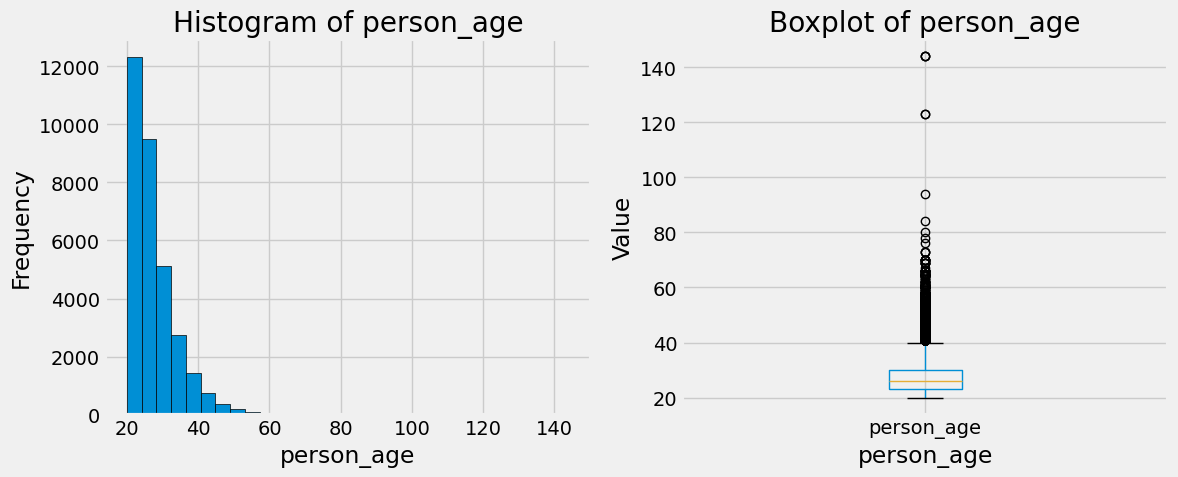

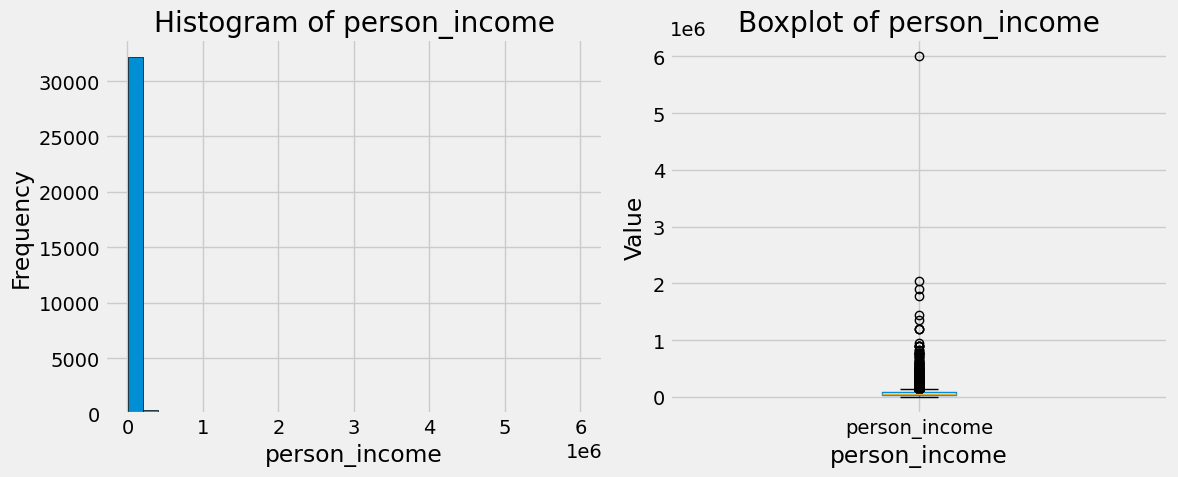

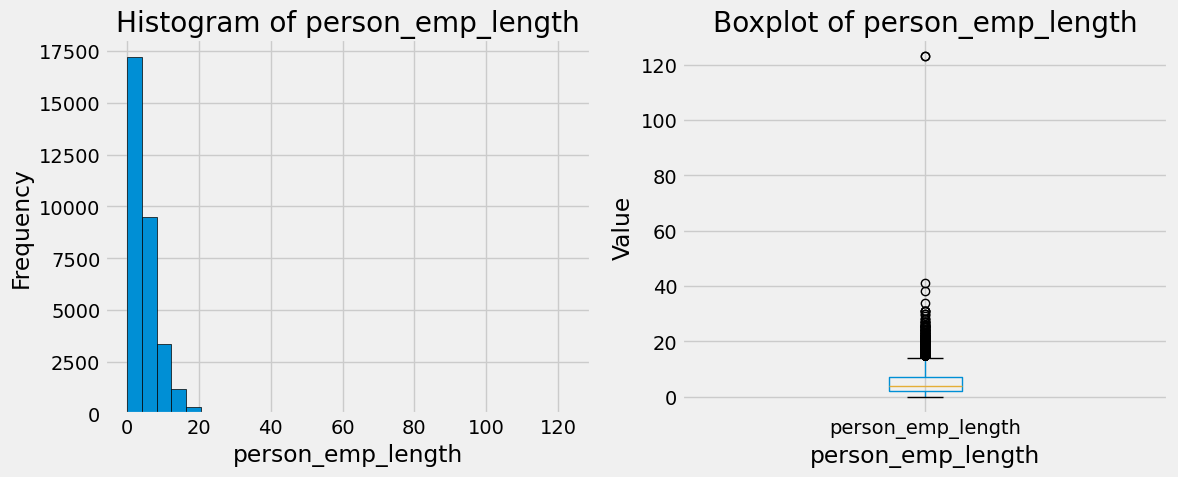

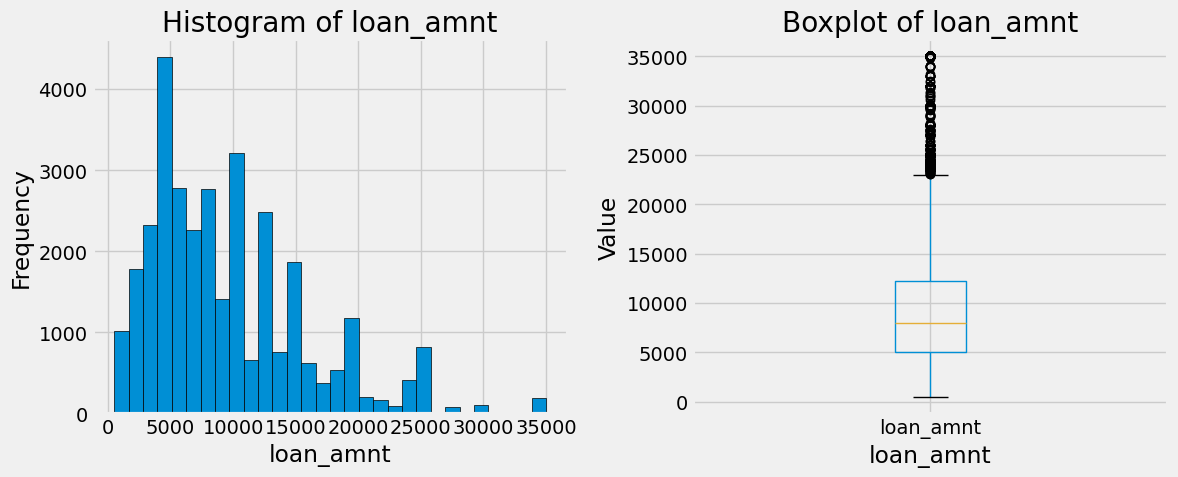

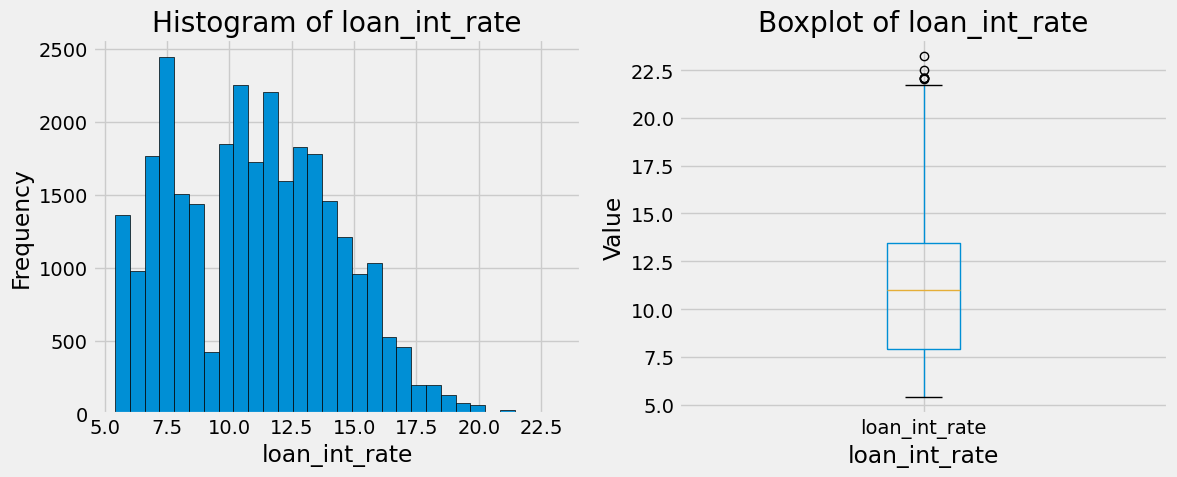

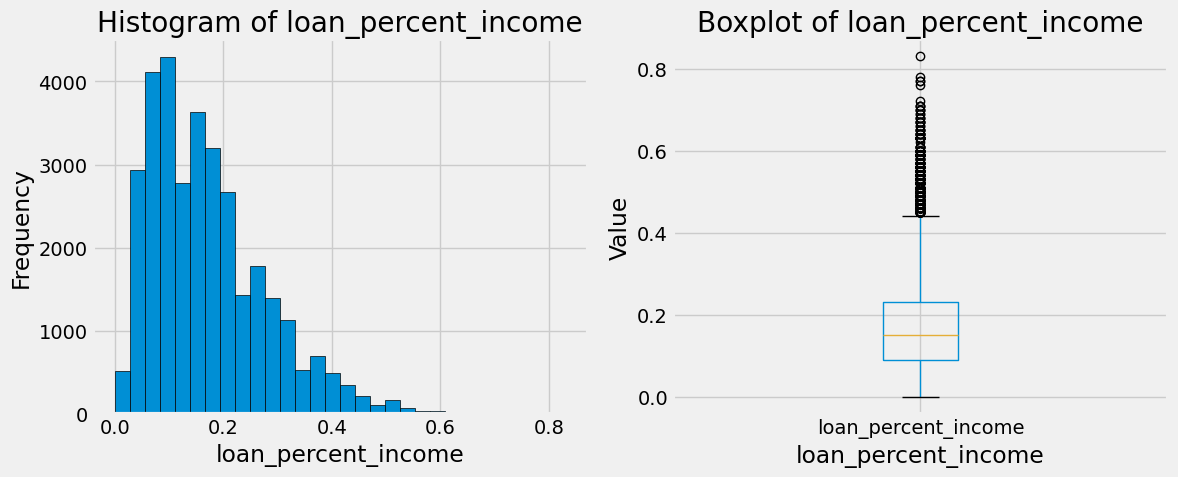

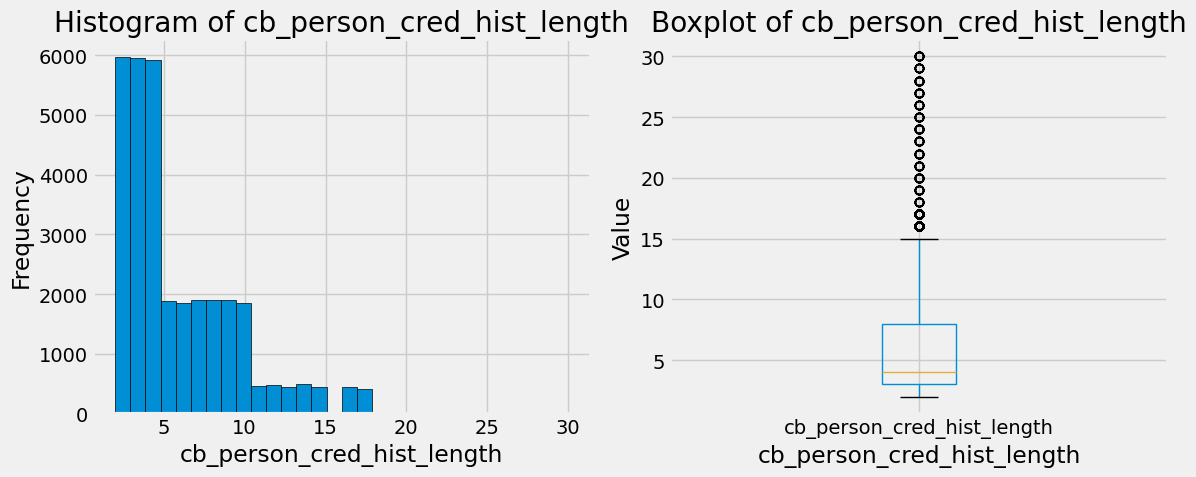

In [9]:
# Assuming df is your DataFrame
numerical_cols = df.select_dtypes("number").columns

plt.style.use('fivethirtyeight')
for numerical_col in numerical_cols:
    if numerical_col != "loan_status":
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 1 row and 2 columns

        # Histogram
        df[numerical_col].hist(ax=axes[0], bins=30, edgecolor='black')
        axes[0].set_title(f"Histogram of {numerical_col}")
        axes[0].set_xlabel(numerical_col)
        axes[0].set_ylabel("Frequency")

        # Boxplot
        df.boxplot(column=numerical_col, ax=axes[1])
        axes[1].set_title(f"Boxplot of {numerical_col}")
        axes[1].set_xlabel(numerical_col)
        axes[1].set_ylabel("Value")

        # Show plots
        plt.tight_layout()
        plt.show()

Suspected outliers inside of the `person_age` where the longest people who ever lived was 122 years old.

In [10]:
df[df["person_age"] > 120]

person_age  person_income person_home_ownership  person_emp_length  \
81            144         250000                  RENT                4.0   
183           144         200000              MORTGAGE                4.0   
575           123          80004                  RENT                2.0   
747           123          78000                  RENT                7.0   
32297         144        6000000              MORTGAGE               12.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
81        VENTURE          C       4800          13.57            0   
183     EDUCATION          B       6000          11.86            0   
575     EDUCATION          B      20400          10.25            0   
747       VENTURE          B      20000            NaN            0   
32297    PERSONAL          C       5000          12.73            0   

       loan_percent_income cb_person_default_on_file  \
81                    0.02                         N   
183                   0.03                         N   
575                   0.25                         N   
747                   0.26                         N   
32297                 0.00                         N   

       cb_person_cred_hist_length  
81                              3  
183                             2  
575                             3  
747                             4  
32297                          25

Looking at the data the numbers seems authentic. But in real life we might need to confirm about this.

### Categorical

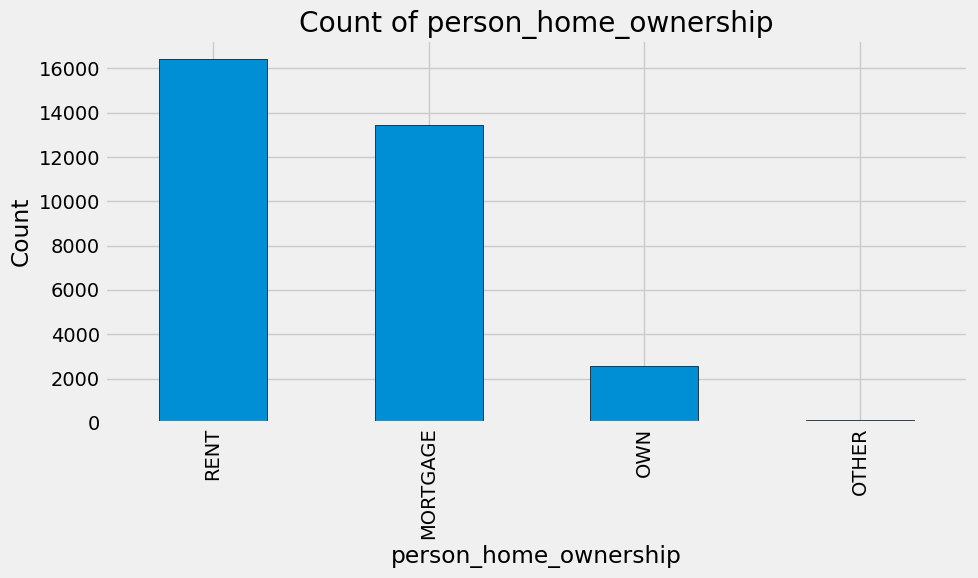

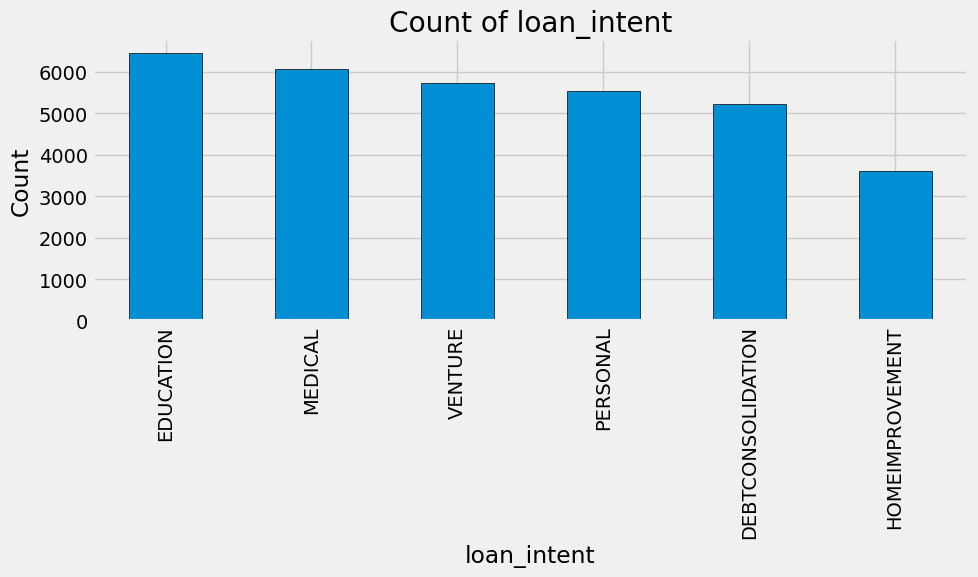

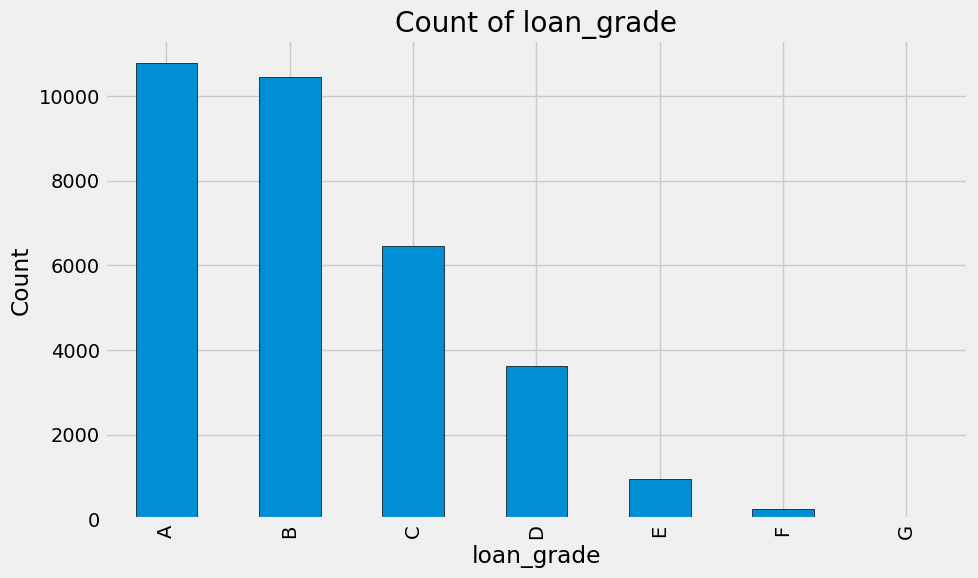

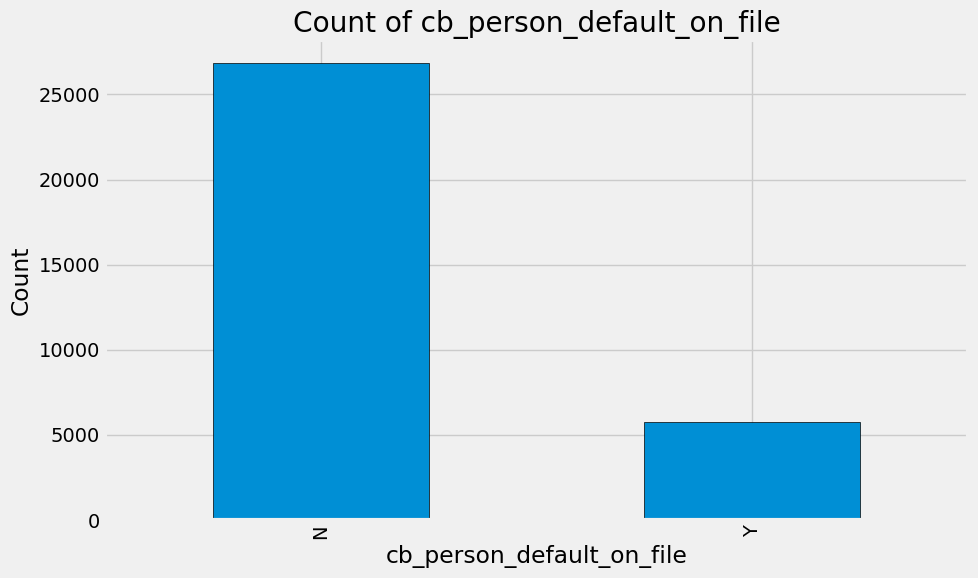

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
categorical_cols = df.select_dtypes("object").columns

plt.style.use('fivethirtyeight')
for categorical_col in categorical_cols:
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure

    # Bar plot
    df[categorical_col].value_counts().plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_title(f"Count of {categorical_col}")
    ax.set_xlabel(categorical_col)
    ax.set_ylabel("Count")

    # Show plot
    plt.tight_layout()
    plt.show()


## Multivariate Analysis

### Numerical vs Target

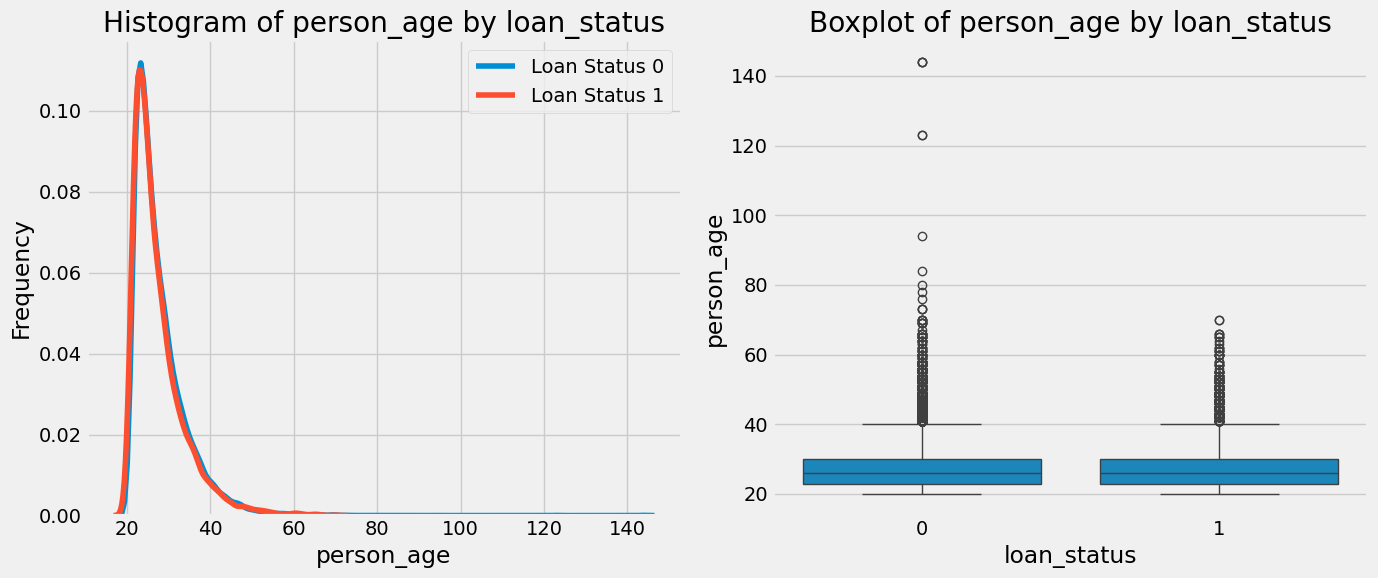

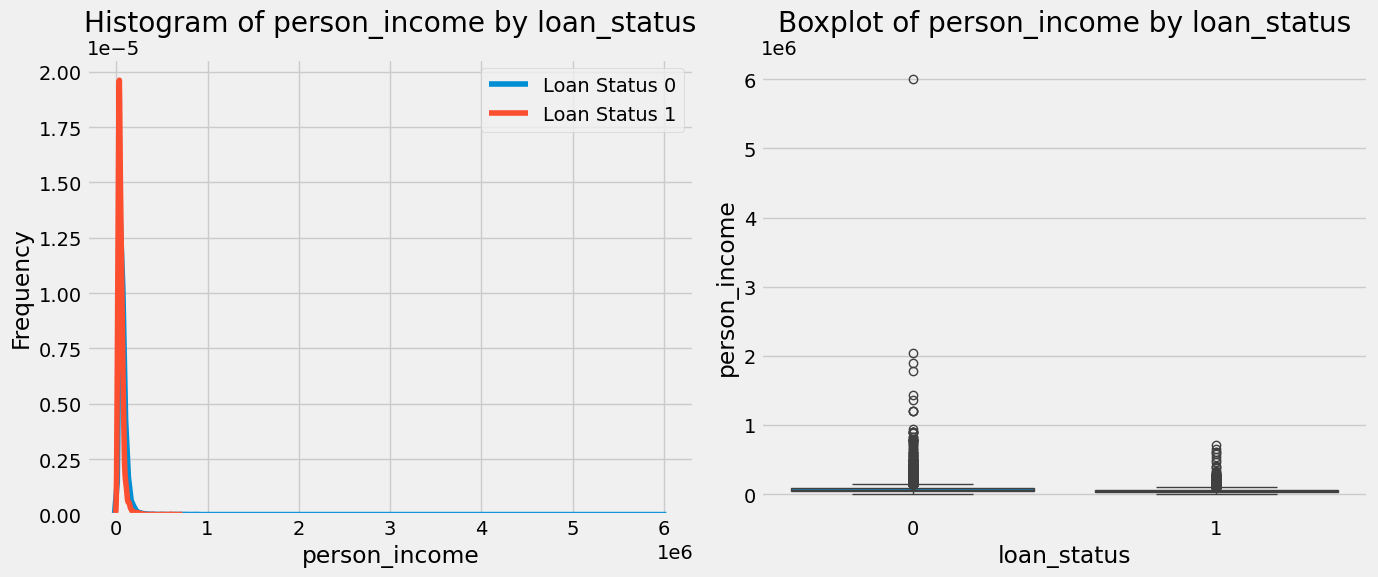

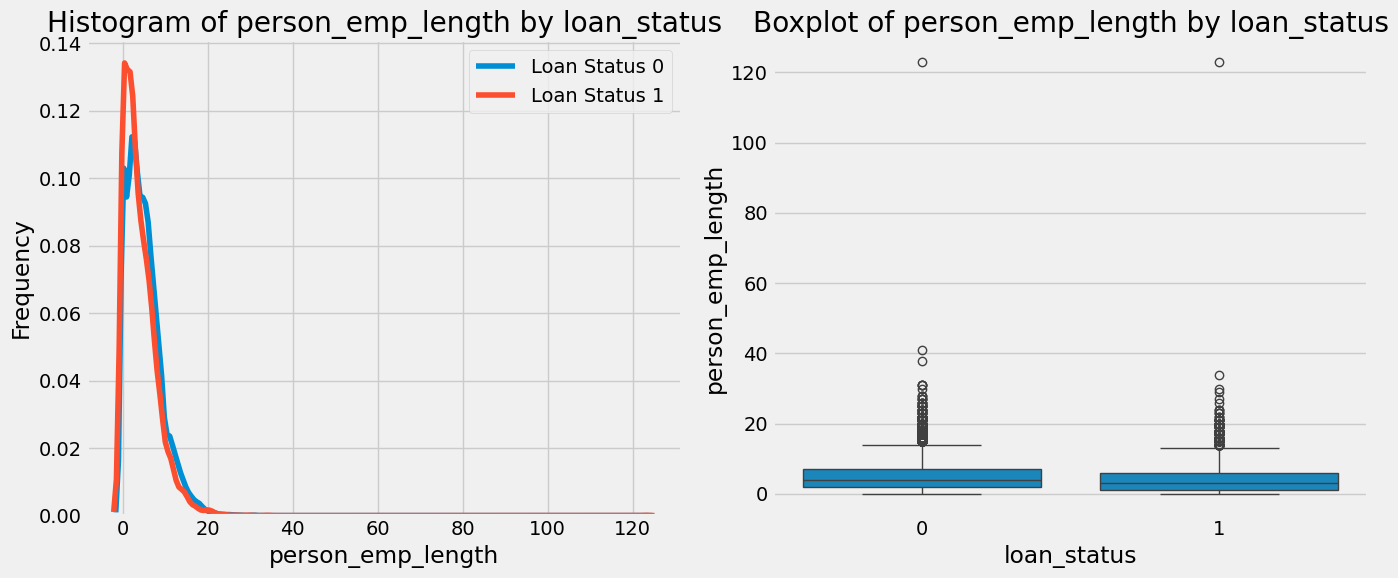

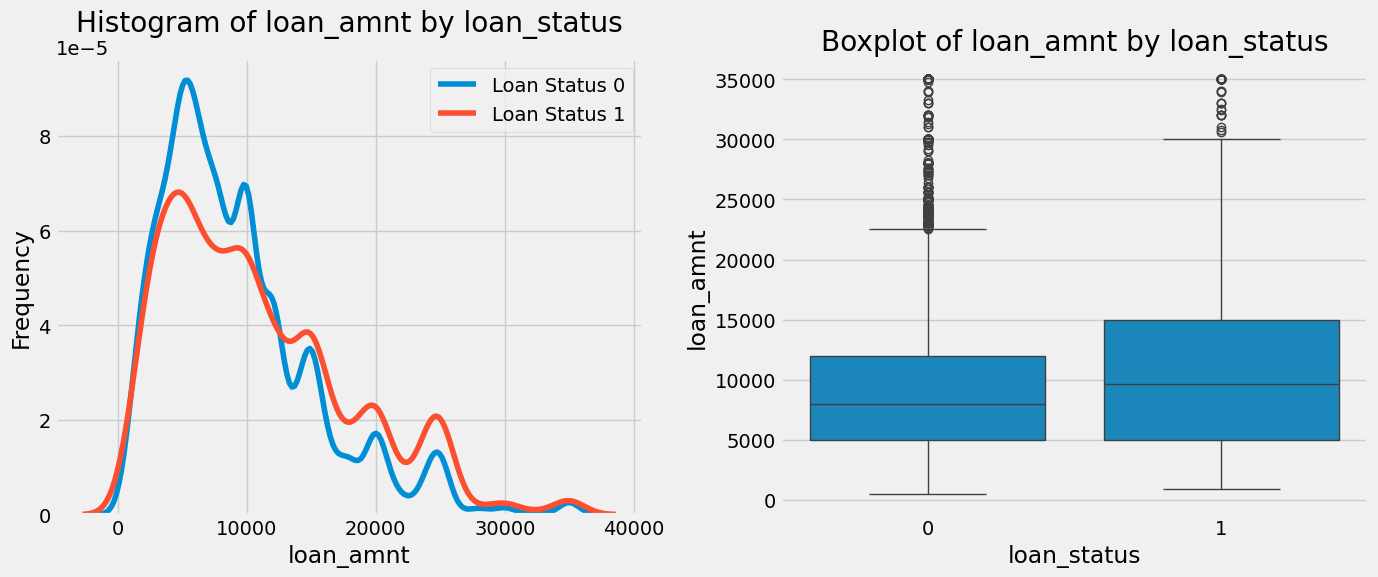

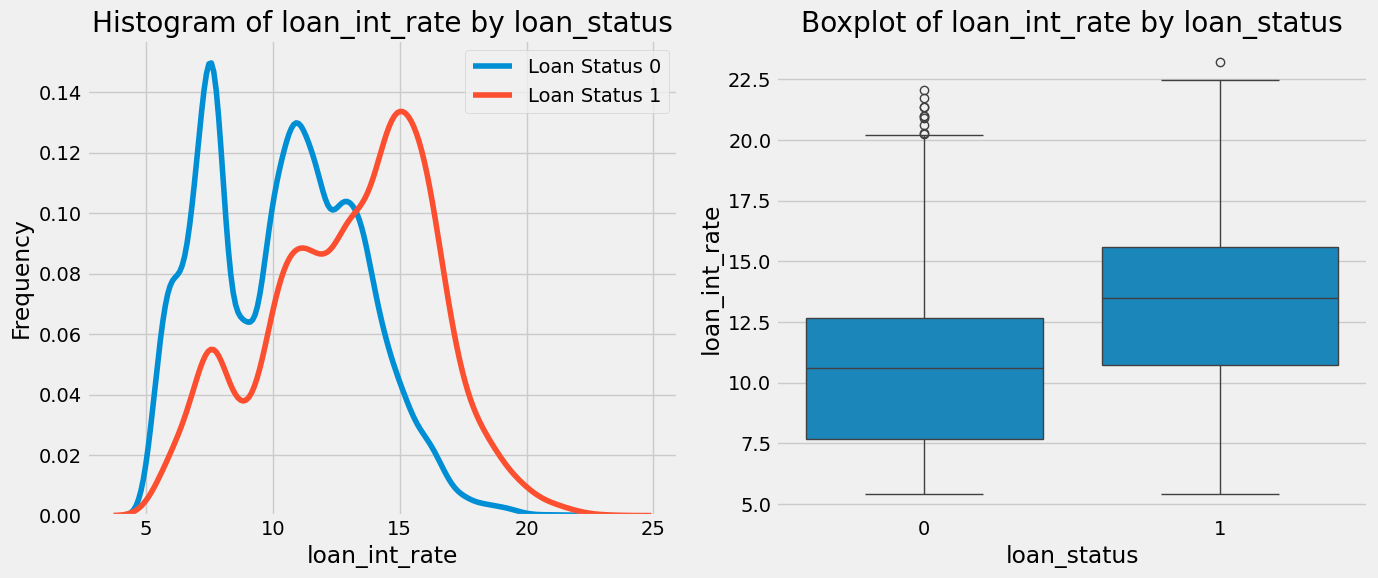

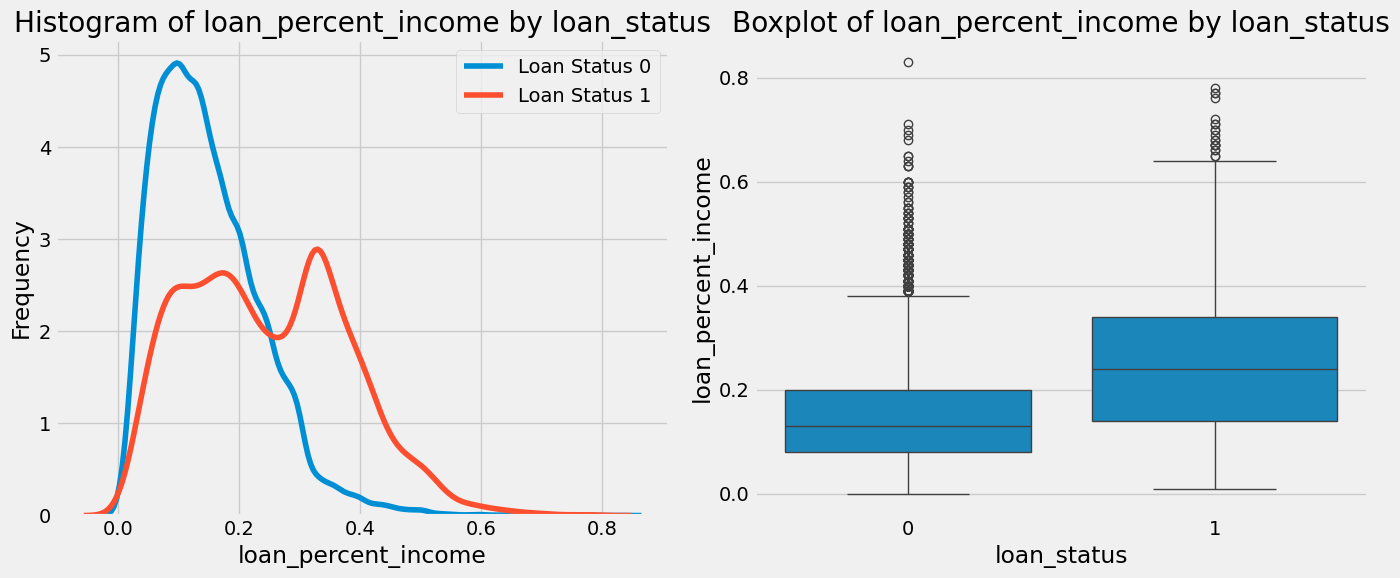

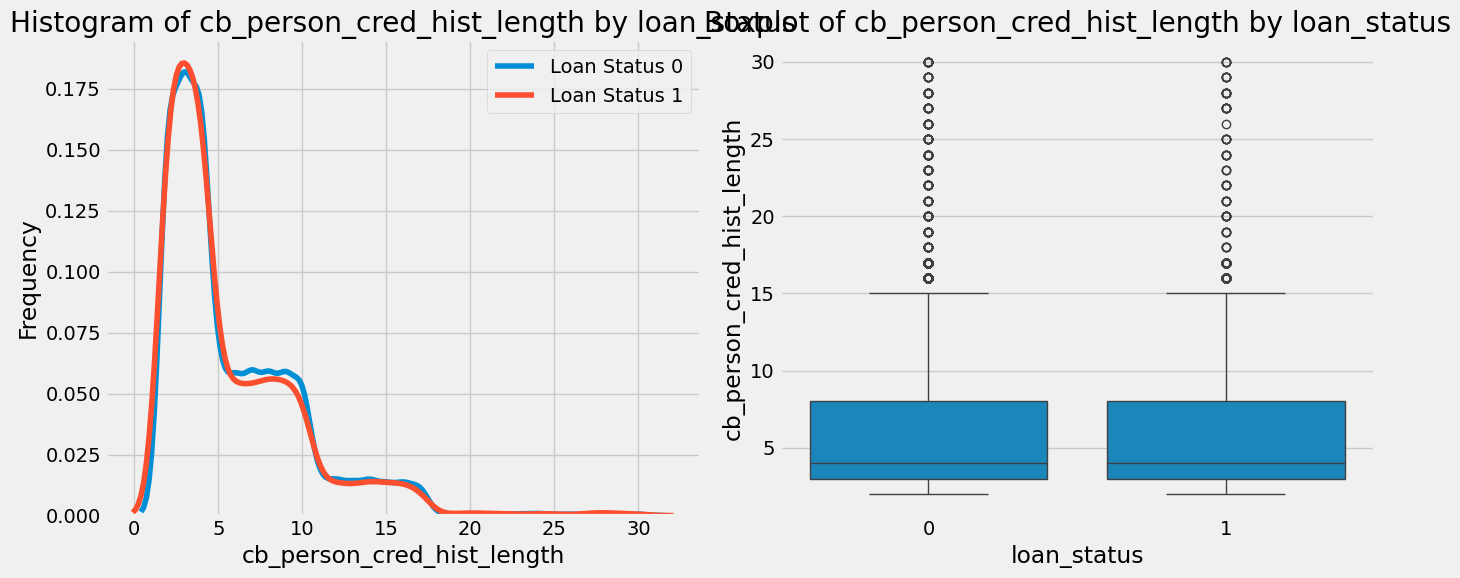

In [19]:
# Assuming df is your DataFrame and "loan_status" is the target variable
numerical_cols = df.select_dtypes("number").columns

plt.style.use('fivethirtyeight')
for numerical_col in numerical_cols:
    if numerical_col != "loan_status":
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a figure with 1 row and 2 columns

        # Histogram with hue
        sns.kdeplot(data=df[df["loan_status"]==0], x=numerical_col, multiple='stack', ax=axes[0], label="Loan Status 0", fill=False)
        sns.kdeplot(data=df[df["loan_status"]==1], x=numerical_col, multiple='stack', ax=axes[0], label="Loan Status 1", fill=False)
        axes[0].set_title(f"Histogram of {numerical_col} by loan_status")
        axes[0].set_xlabel(numerical_col)
        axes[0].set_ylabel("Frequency")
        axes[0].legend()

        # Boxplot with hue
        sns.boxplot(data=df, x='loan_status', y=numerical_col, ax=axes[1])
        axes[1].set_title(f"Boxplot of {numerical_col} by loan_status")
        axes[1].set_xlabel('loan_status')
        axes[1].set_ylabel(numerical_col)

        # Show plots
        plt.tight_layout()
        plt.show()


2 features that shows higher chance loan status disapproval: `loan percent income` is high and `loan interest rate` are both high

### Categorical vs Target

C:\Users\923006079\AppData\Local\Temp\ipykernel_1676\4194045871.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


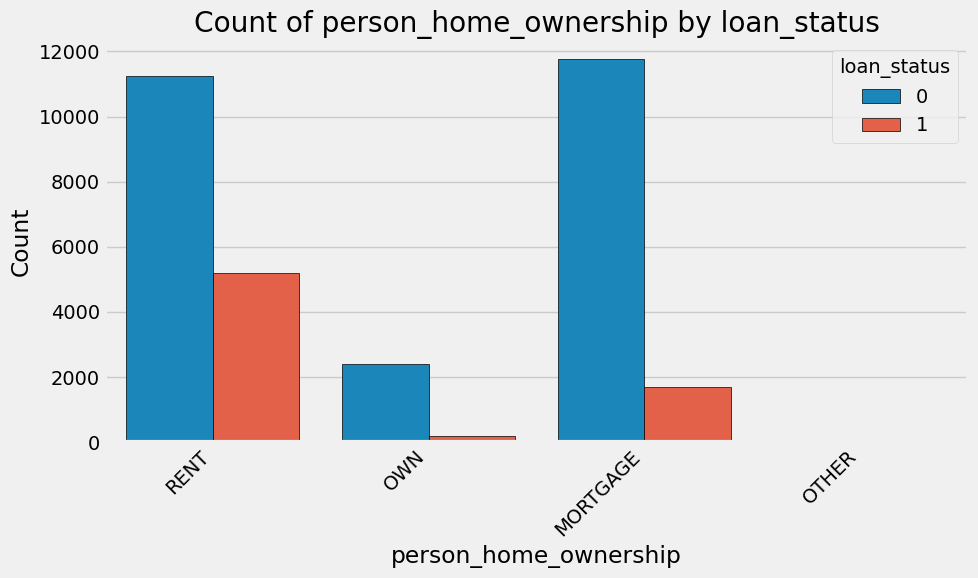

C:\Users\923006079\AppData\Local\Temp\ipykernel_1676\4194045871.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


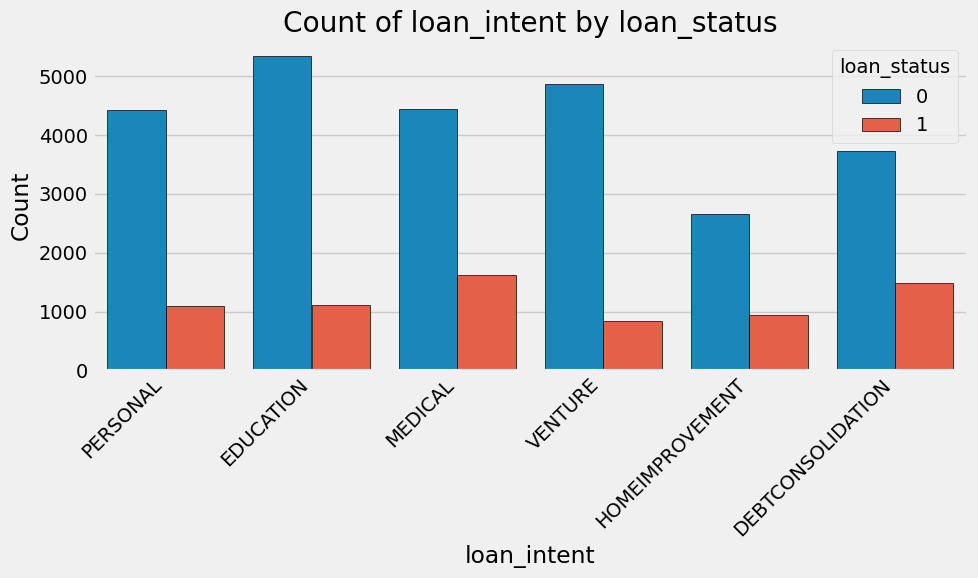

C:\Users\923006079\AppData\Local\Temp\ipykernel_1676\4194045871.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


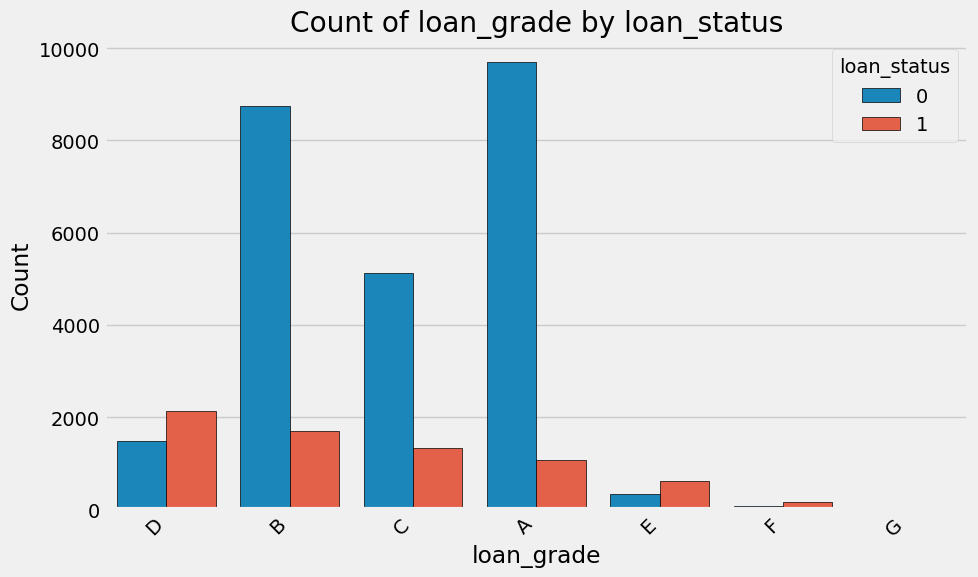

C:\Users\923006079\AppData\Local\Temp\ipykernel_1676\4194045871.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


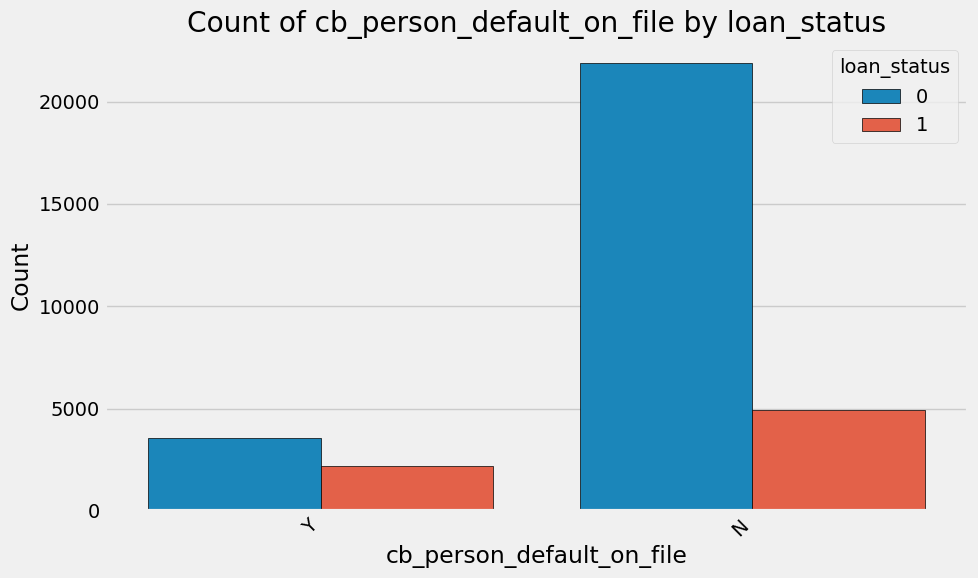

In [21]:
# Assuming df is your DataFrame and "loan_status" is the target variable
plt.style.use('fivethirtyeight')

categorical_cols = df.select_dtypes("object").columns
for categorical_col in categorical_cols:
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure

    # Bar plot with hue
    sns.countplot(data=df, x=categorical_col, hue='loan_status', ax=ax, edgecolor='black')
    ax.set_title(f"Count of {categorical_col} by loan_status")
    ax.set_xlabel(categorical_col)
    ax.set_ylabel("Count")

    # Rotate x labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Show plot
    plt.tight_layout()
    plt.show()


In [83]:
# Count of 1 and 0 for cb_person_default_on_file grouped by loan_status
count_result = df.groupby("cb_person_default_on_file")['loan_status'].value_counts(normalize=True).unstack(fill_value=0)

# Display the result
count_result

loan_status                       0         1
cb_person_default_on_file                    
N                          0.816068  0.183932
Y                          0.621932  0.378068

In [84]:
# Count of 1 and 0 for cb_person_default_on_file grouped by loan_status
count_result = df.groupby('person_home_ownership')['loan_status'].value_counts().unstack(fill_value=0) / len(df)

# Display the result
count_result

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.360762  0.051871
OTHER                  0.002271  0.001013
OWN                    0.073386  0.005924
RENT                   0.345416  0.159357

In [85]:
# Count of 1 and 0 for cb_person_default_on_file grouped by loan_status
count_result = df.groupby('loan_grade')['loan_status'].value_counts().unstack(fill_value=0) / len(df)

# Display the result
count_result

loan_status         0         1
loan_grade                     
A            0.297842  0.032933
B            0.268561  0.052208
C            0.157116  0.041098
D            0.045579  0.065713
E            0.010528  0.019060
F            0.002179  0.005218
G            0.000031  0.001934

1. Those who has history of default in the past has 37% probability of default.
2. Those who still **rent** has 16% probability of default.

## Multicollinearity

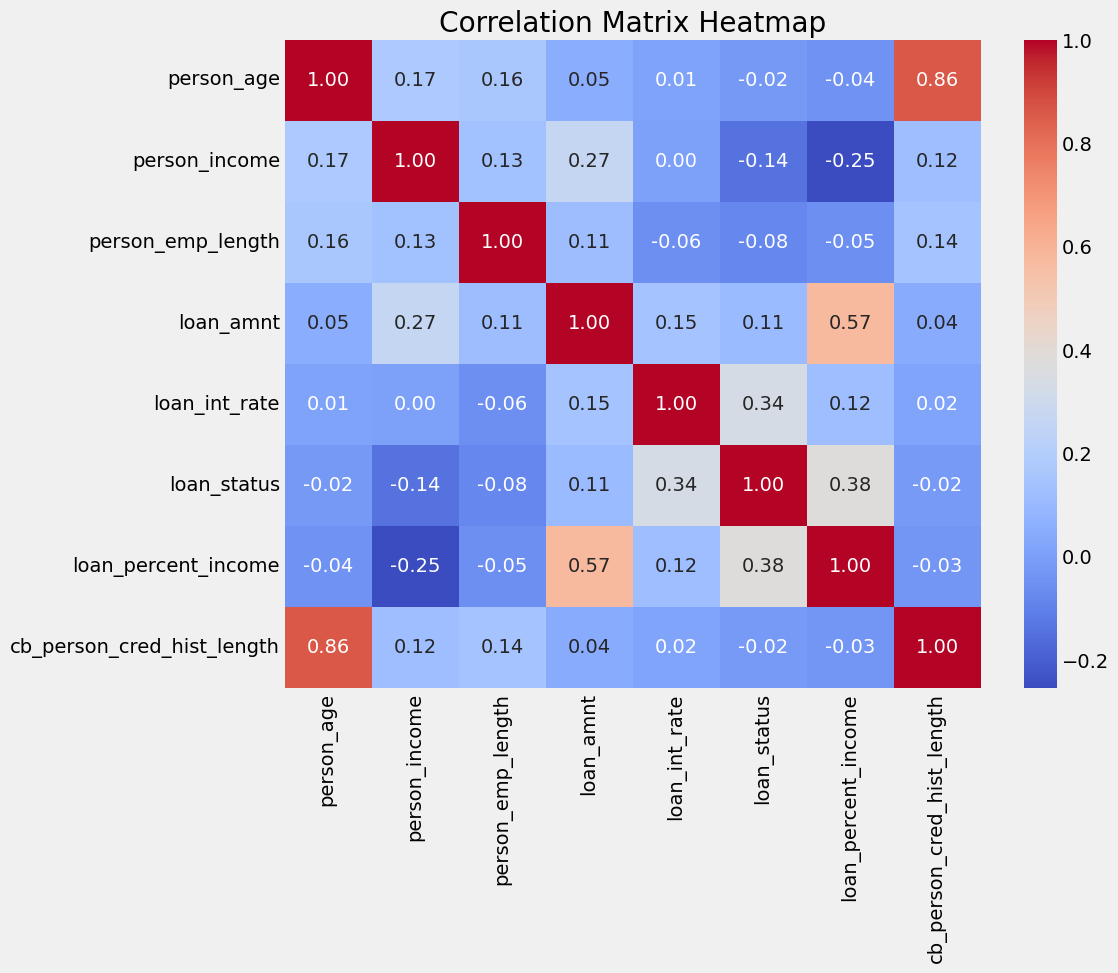

In [89]:
corr = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

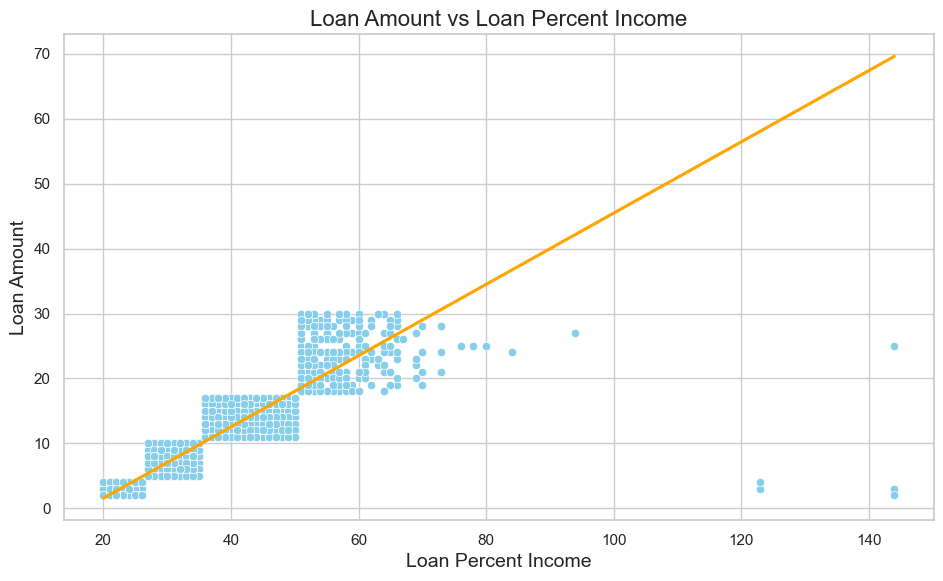

In [114]:
# Set style
sns.set(style="whitegrid")

# Create scatterplot with customized aesthetics
plt.figure(figsize=(10, 6))
sns.scatterplot(x="person_age", y="cb_person_cred_hist_length", data=df, color='skyblue')

# Add trend line
sns.regplot(x="person_age", y="cb_person_cred_hist_length", data=df, scatter=False, color='orange', ci=None)

# Add labels and title
plt.xlabel("Loan Percent Income", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)
plt.title("Loan Amount vs Loan Percent Income", fontsize=16)

# Add annotations or additional information if needed

# Show plot
plt.show()

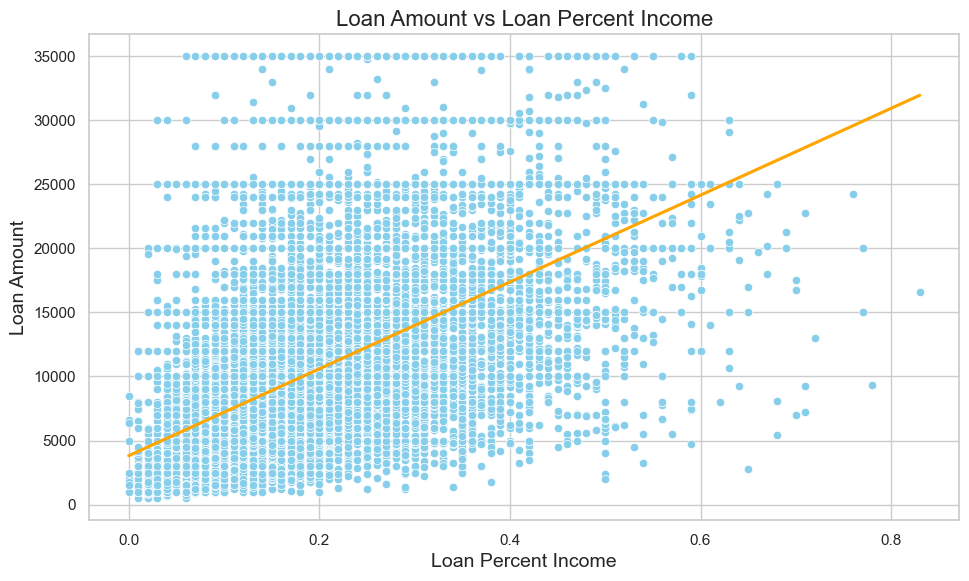

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create scatterplot with customized aesthetics
plt.figure(figsize=(10, 6))
sns.scatterplot(x="loan_percent_income", y="loan_amnt", data=df, color='skyblue')

# Add trend line
sns.regplot(x="loan_percent_income", y="loan_amnt", data=df, scatter=False, color='orange', ci=None)

# Add labels and title
plt.xlabel("Loan Percent Income", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)
plt.title("Loan Amount vs Loan Percent Income", fontsize=16)

# Add annotations or additional information if needed

# Show plot
plt.show()


# WOE and IV

## Data Splitting

In [31]:
# split data betweem train and text
X, y = df.drop(columns=["loan_status"]), df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

## 1. Perform Binning on Categorical Variables

In [32]:
def create_binning(df: pd.DataFrame, predictor_label: str, num_of_bins: int) -> pd.DataFrame:
    df[predictor_label + "_bin"] = pd.qcut(
        df[predictor_label],
        q = num_of_bins, 
        duplicates="drop"
    )
    return df

numerical_cols =  [col for col in train.select_dtypes("number") if col != "loan_status"]
train_binned = train.copy()
for numerical_col in numerical_cols:
    train_binned = create_binning(
        df = train_binned,
        predictor_label = numerical_col,
        num_of_bins = 5
    )
display(train_binned.isna().sum())

person_age                           0
person_income                        0
person_home_ownership                0
person_emp_length                  738
loan_intent                          0
loan_grade                           0
loan_amnt                            0
loan_int_rate                     2501
loan_percent_income                  0
cb_person_default_on_file            0
cb_person_cred_hist_length           0
loan_status                          0
person_age_bin                       0
person_income_bin                    0
person_emp_length_bin              738
loan_amnt_bin                        0
loan_int_rate_bin                 2501
loan_percent_income_bin              0
cb_person_cred_hist_length_bin       0
dtype: int64

In [33]:
# Define columns with missing values
missing_columns = ['person_emp_length_bin', 'loan_int_rate_bin']

# Perform grouping for all columns
for column in missing_columns:

    # Add category 'Missing' to replace the missing values
    train_binned[column] = train_binned[column].cat.add_categories('Missing')

    # Replace missing values with category 'Missing'
    train_binned[column] = train_binned[column].fillna(value = 'Missing')

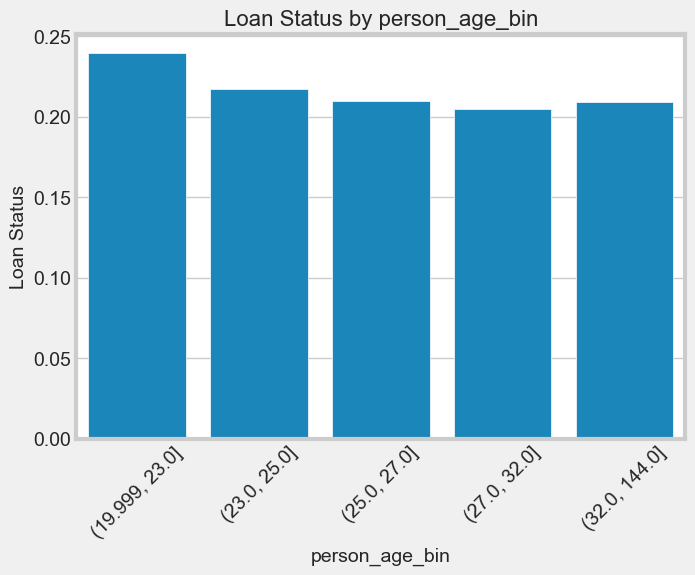

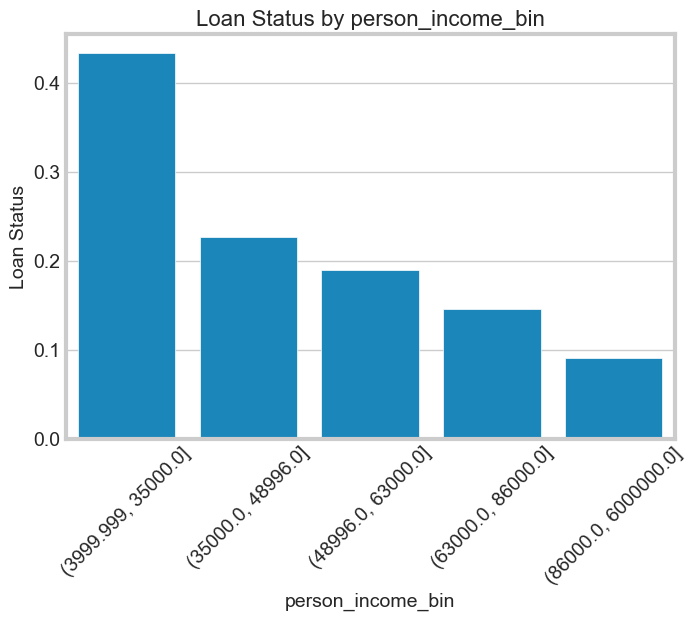

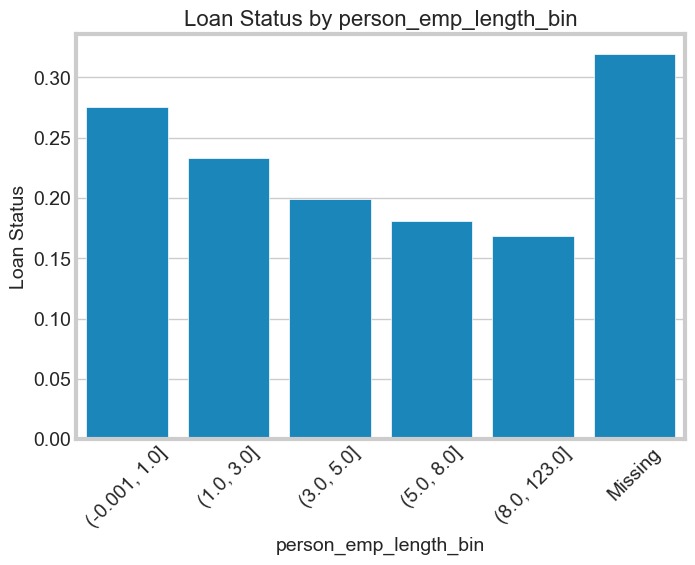

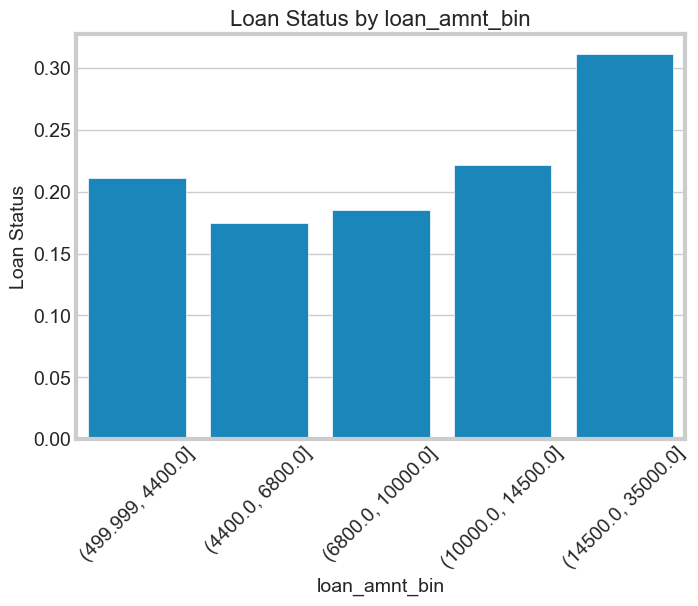

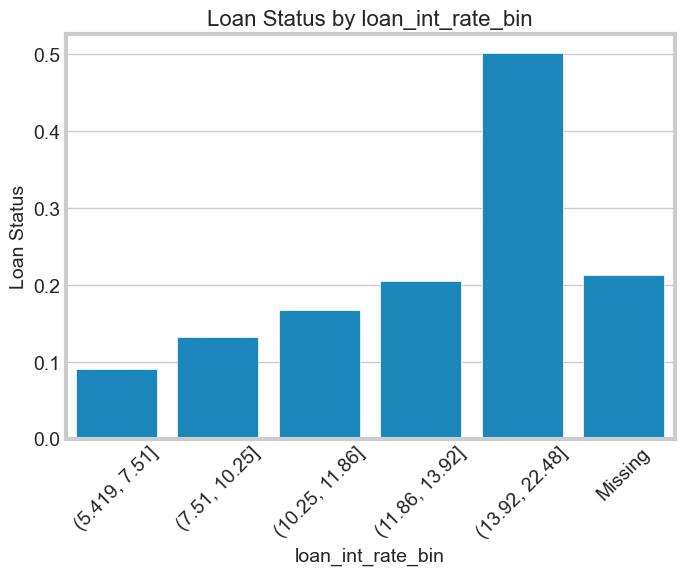

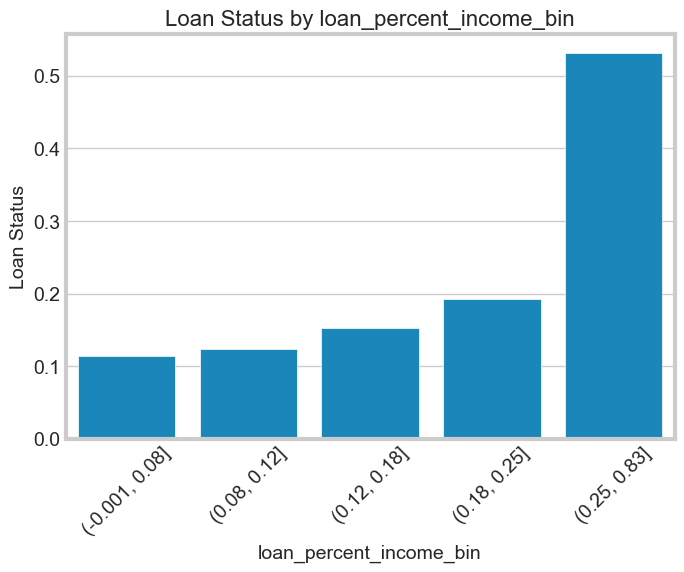

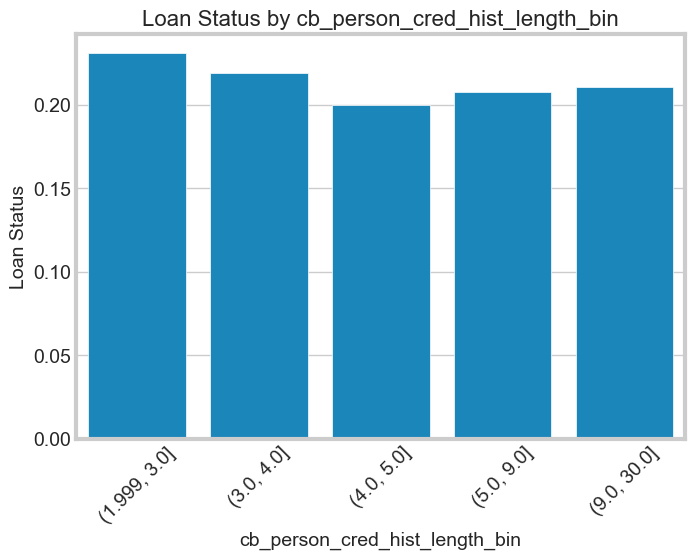

In [34]:
plt.style.use('fivethirtyeight')
for col in train_binned.columns:
    if "bin" in col:
        # Set figure size and style
        plt.figure(figsize=(7, 5))
        sns.set_style("whitegrid")

        # Create bar plot with customized aesthetics
        sns.barplot(x=col, y="loan_status", data=train_binned, errorbar=None)

        # Add title and labels
        plt.title(f"Loan Status by {col}", fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel("Loan Status", fontsize=14)
        plt.xticks(rotation=45)

        # Show plot
        plt.show()


## 2. Calculate WoE and IV

In [35]:
drop_cols = [
    "person_age", "person_income", "person_emp_length", "loan_amnt",
    "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"
]
train_binned = train_binned.drop(columns=drop_cols)

In [36]:
# 1. Calculate the total amount of values inside each bin. Calculate the default and non default cases
crosstabs = {}
for col in train_binned.columns:
    if col != "loan_status":
        crosstabs[col] = pd.crosstab(train_binned[col], train_binned["loan_status"], margins=True)

In [37]:
# 2. Calculate the Weight of Evidence and Information Value
WOE_df = pd.DataFrame()
IV_df = pd.DataFrame()

for col, crosstab in crosstabs.items(): 
    crosstab["proportion_not_default"] = crosstab[0] / crosstab[0]["All"]
    crosstab["proportion_default"] = crosstab[1] / crosstab[1]["All"]
    crosstab["WoE"] = np.log(crosstab["proportion_not_default"]/ crosstab["proportion_default"])
    IV = np.sum((crosstab["proportion_not_default"]-crosstab["proportion_default"])*crosstab["WoE"])

    crosstab = crosstab.reset_index()
    temp_WOE_df = crosstab.iloc[:-1, [0, -1]].copy()
    temp_WOE_df.columns = ["Feature Value", "WoE"]
    temp_WOE_df.loc[:, "Feature Name"] = col
    WOE_df = pd.concat((WOE_df, temp_WOE_df), axis=0)
    IV_df = pd.concat((IV_df, pd.DataFrame({"Feature Name": [col], "IV": [IV]})))

WOE_df = WOE_df[["Feature Name", "Feature Value", "WoE"]]
WOE_df = WOE_df.reset_index(drop=True)
IV_df = IV_df.reset_index(drop=True)

gc.enable()
crosstab = None
crosstabs = None
gc.collect()

6188

In [38]:
# 3. Filter those with low value of IV
def interpret_iv(value):
    if value < 0.02:
        return "Not Predictive"
    elif 0.02 <= value and value < 0.1:
        return "Weak Predictive"
    elif 0.1 <= value and value < 0.3:
        return "Medium Predictive"
    elif 0.3 <= value and value < 0.5:
        return "Strong Predictive"
    else:
        return "Very Strong Predictive"

IV_df["Interpretation"] = IV_df["IV"].apply(lambda x: interpret_iv(x))
IV_df = IV_df.sort_values(by="IV", ascending=False)
IV_df

Feature Name        IV          Interpretation
2                       loan_grade  0.869018  Very Strong Predictive
9          loan_percent_income_bin  0.709054  Very Strong Predictive
8                loan_int_rate_bin  0.600325  Very Strong Predictive
5                person_income_bin  0.459059       Strong Predictive
0            person_home_ownership  0.389711       Strong Predictive
3        cb_person_default_on_file  0.162480       Medium Predictive
1                      loan_intent  0.088686         Weak Predictive
7                    loan_amnt_bin  0.077772         Weak Predictive
6            person_emp_length_bin  0.059921         Weak Predictive
4                   person_age_bin  0.006276          Not Predictive
10  cb_person_cred_hist_length_bin  0.003927          Not Predictive

## 3. Plot WoE

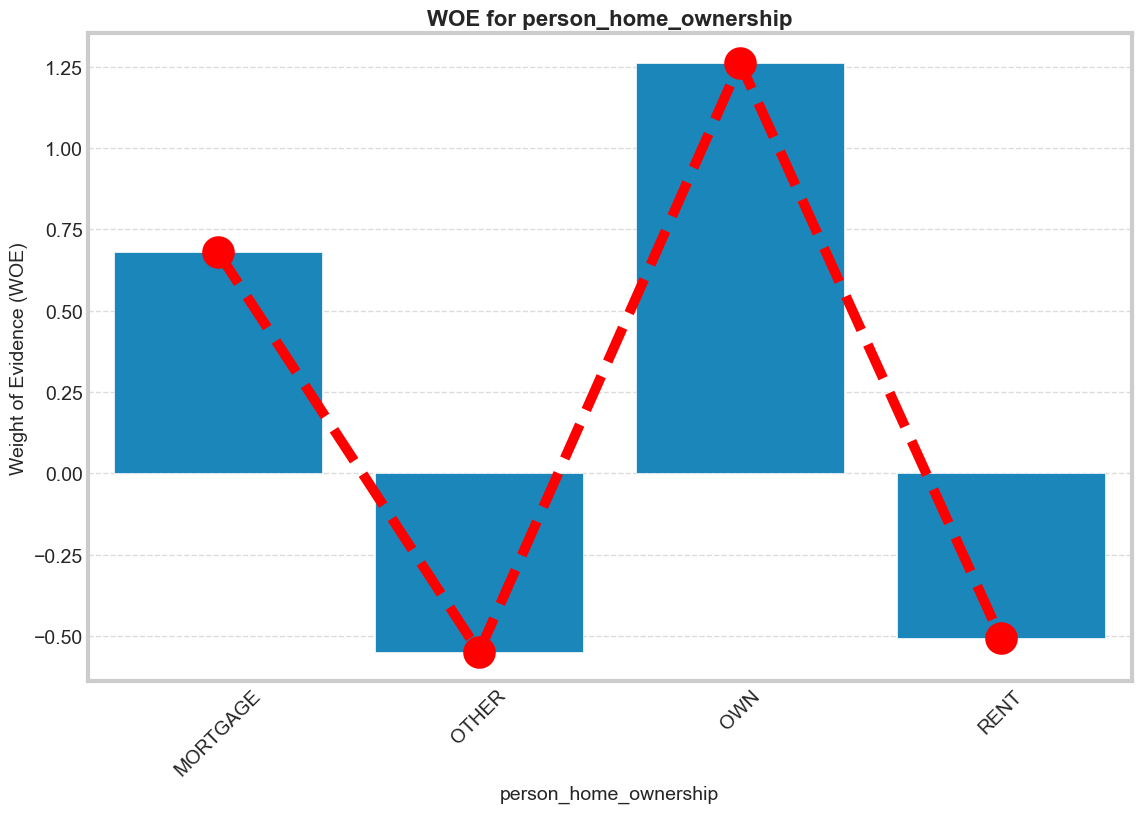

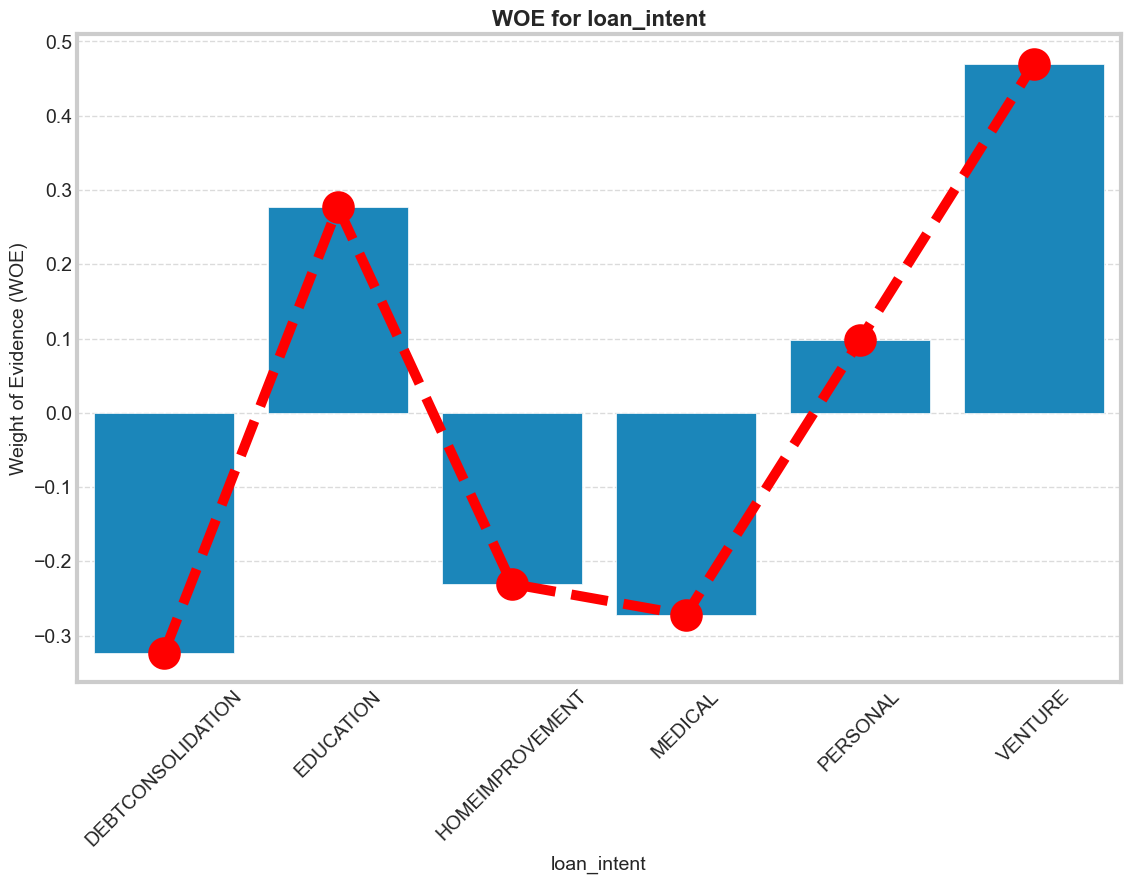

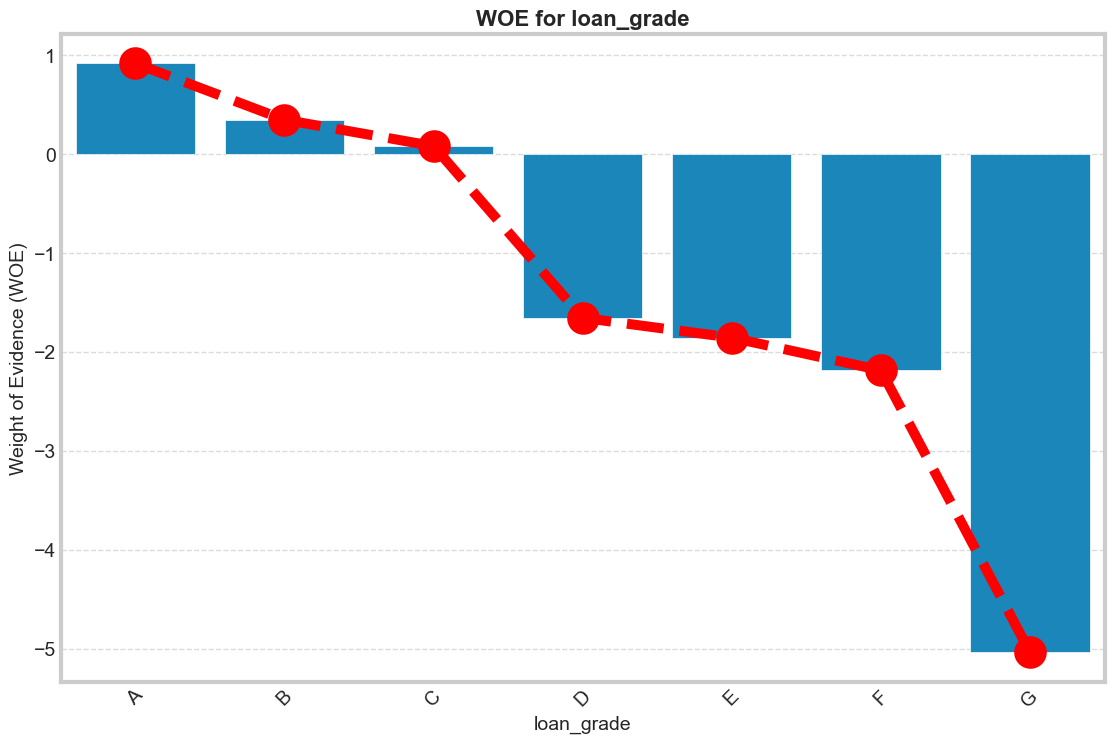

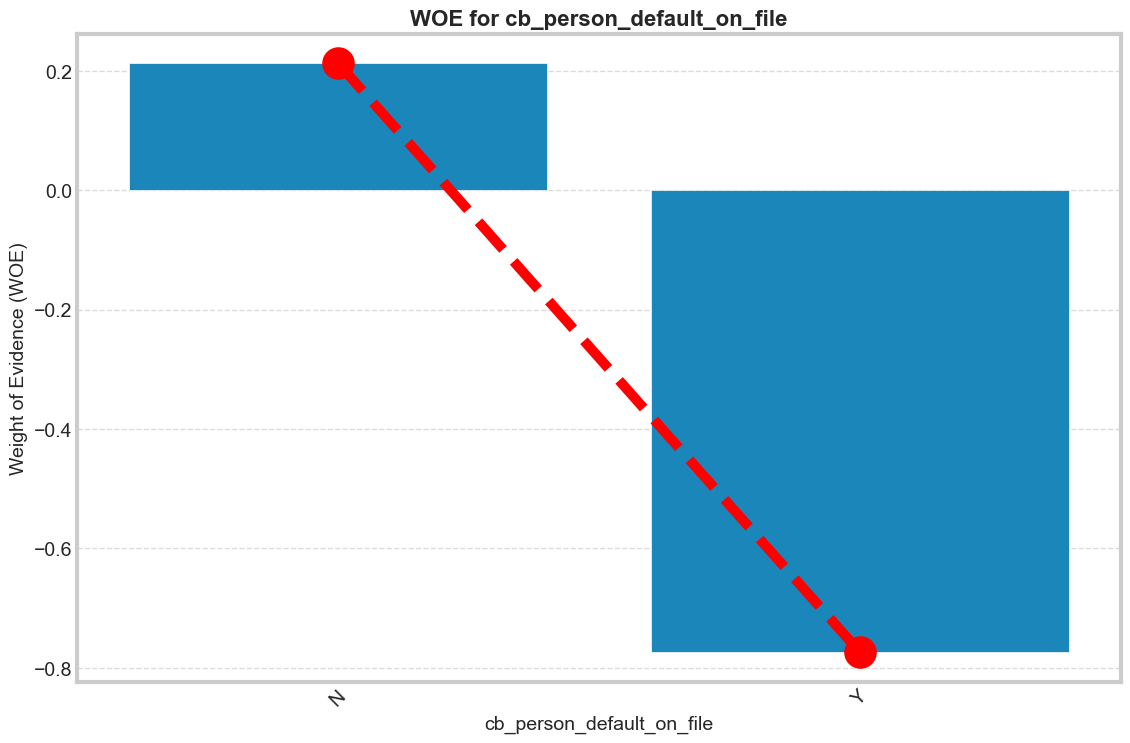

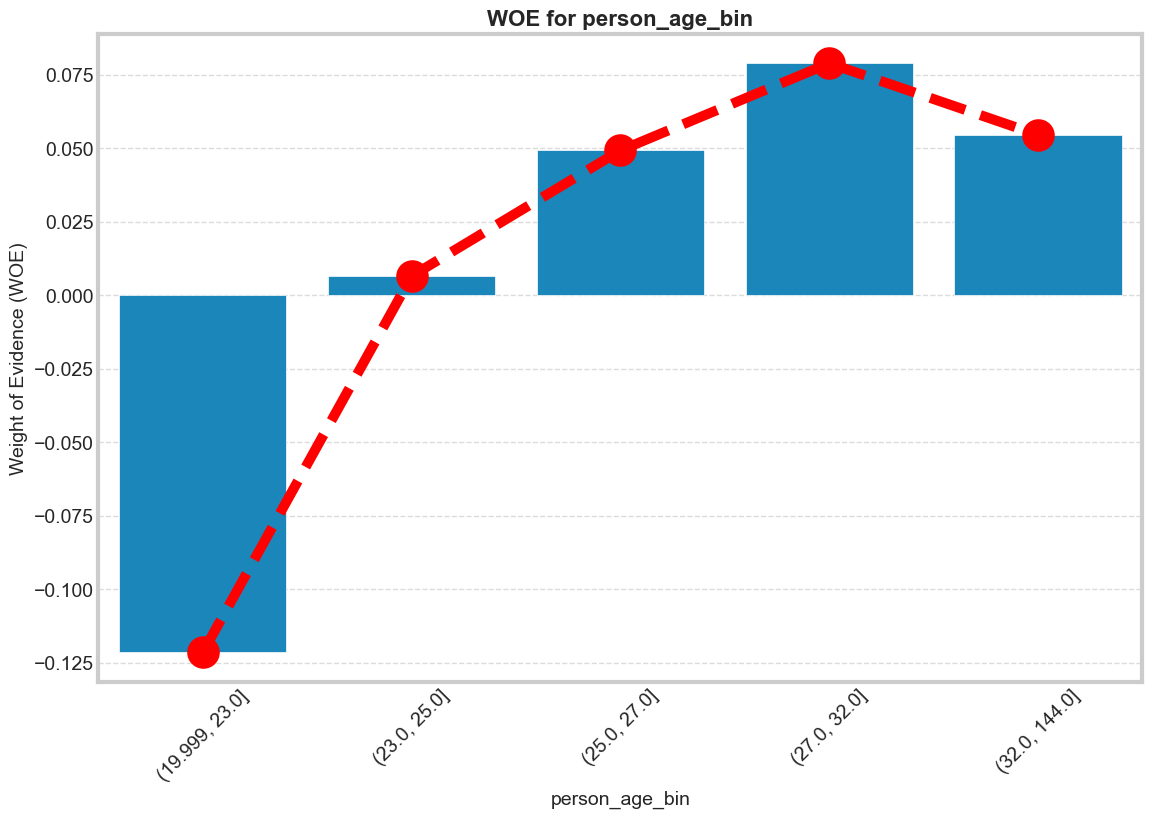

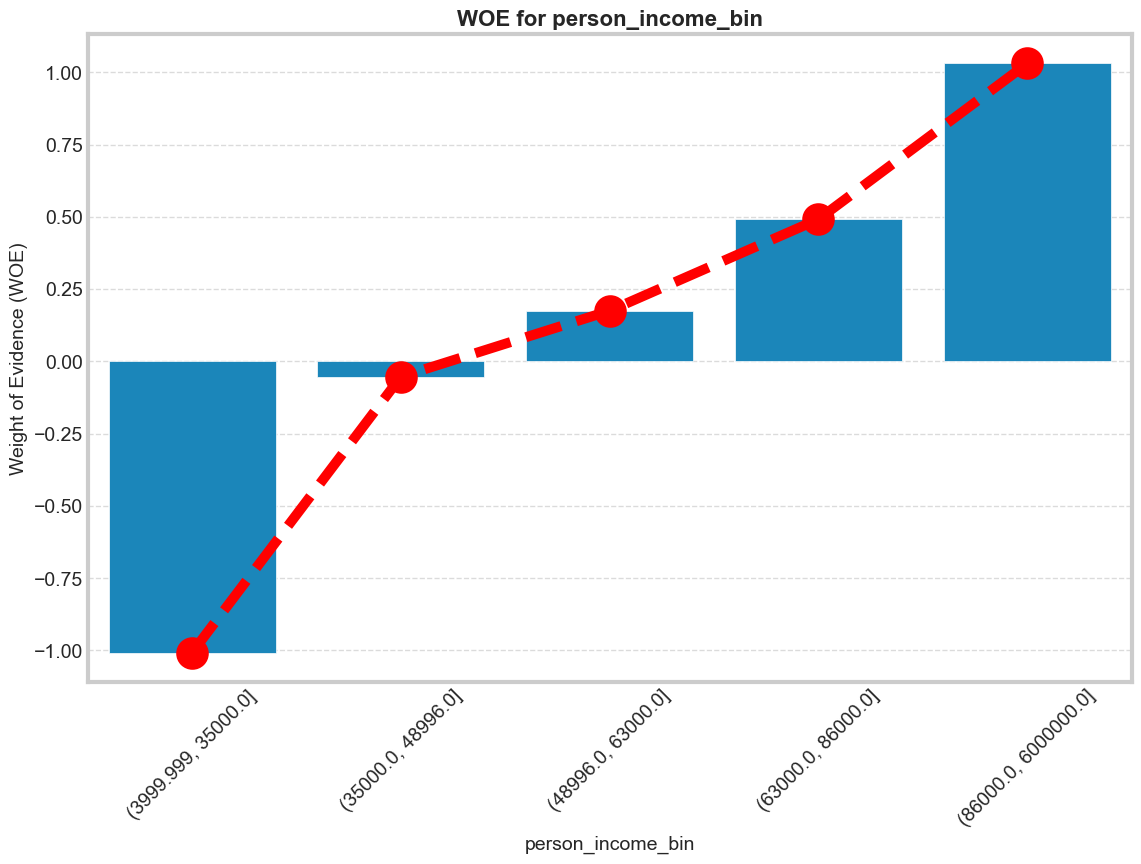

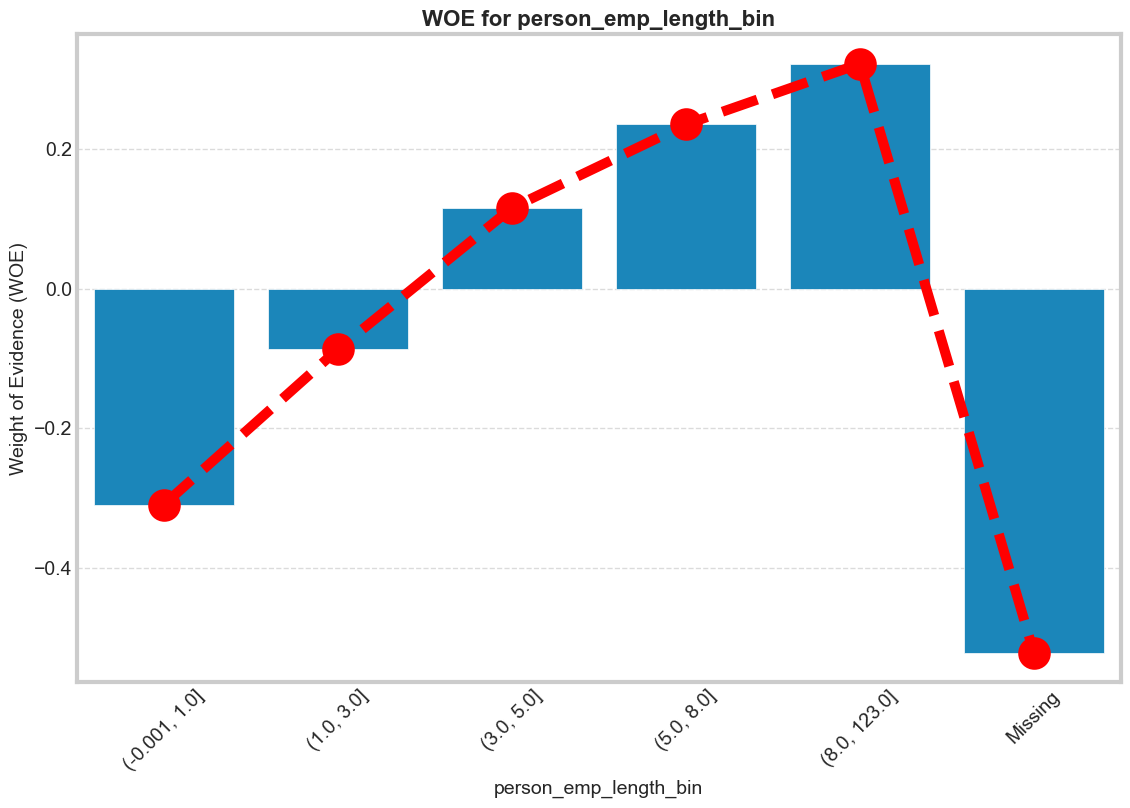

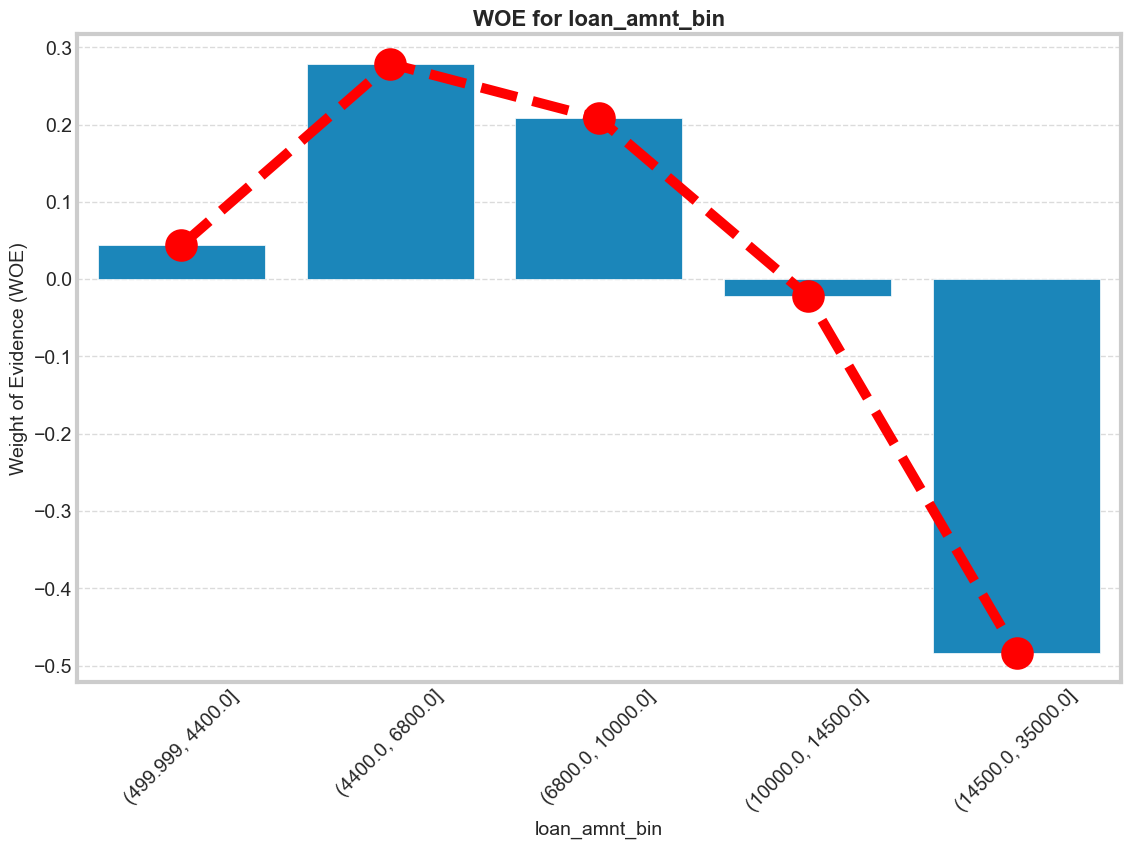

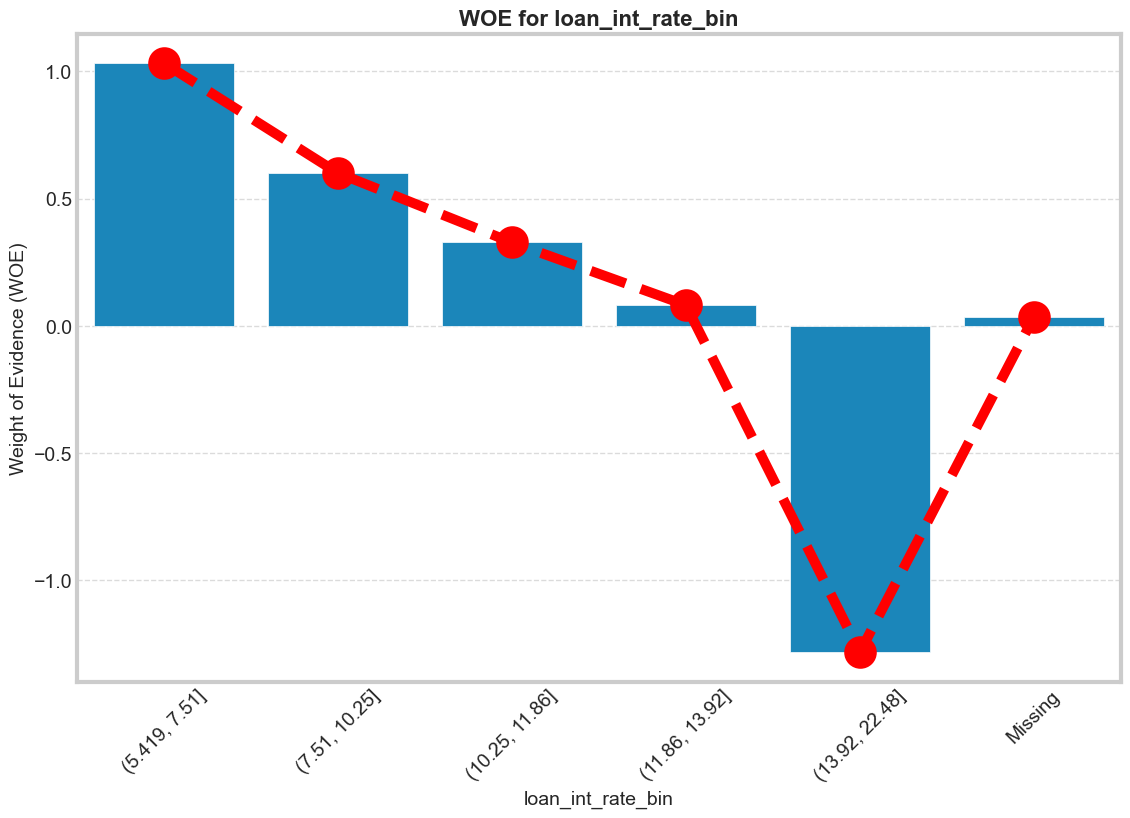

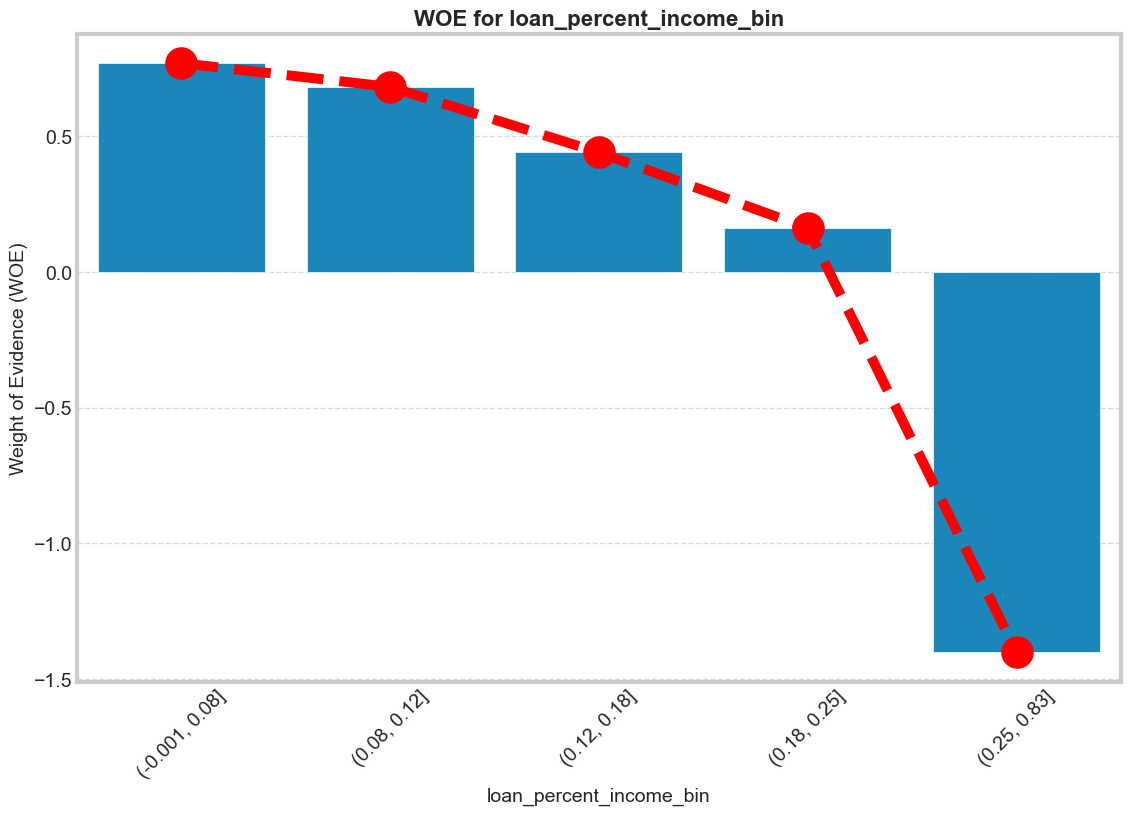

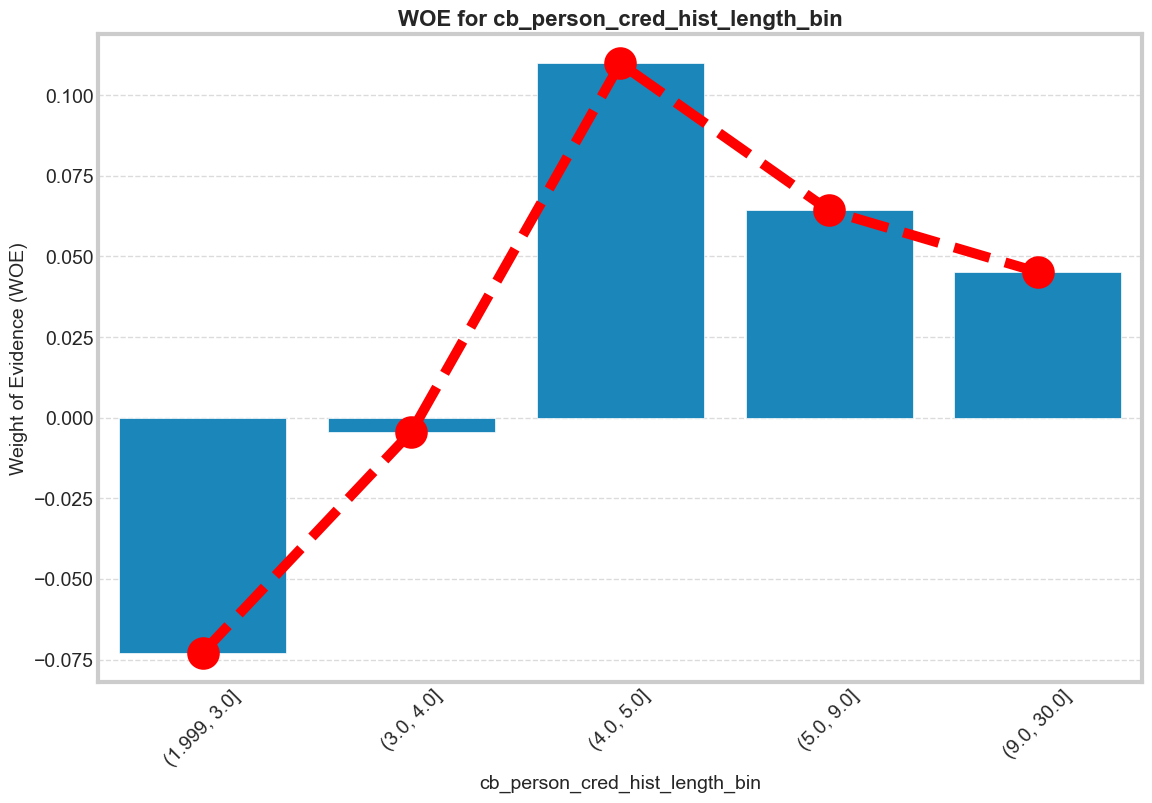

In [11]:
feature_names = WOE_df["Feature Name"].unique()
for feature in feature_names:
    filtered_WOE_df = WOE_df[WOE_df['Feature Name'] == feature]

    # Define the plot size and title
    plt.figure(figsize=(12, 8))
    plt.title(f'WOE for {feature}', fontsize=16, fontweight='bold')

    # Plot the WOE using barplot for better visualization
    barplot = sns.barplot(x='Feature Value', y='WoE', data=filtered_WOE_df)
    pointplot = sns.pointplot(x='Feature Value', y='WoE', data=filtered_WOE_df, linestyles='--', color="red", markers="o")
    
    # Rotate the label of x-axis for better readability
    plt.xticks(rotation=45)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Weight of Evidence (WOE)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()


## 4. Replace the Feature Values with WoE

In [39]:
feature_names = WOE_df["Feature Name"].unique()
woe_dict_map = {}
for feature_name in feature_names:
    filtered_WOE_df = WOE_df[WOE_df["Feature Name"]==feature_name]
    woe_dict_map[feature_name] = filtered_WOE_df.drop(columns=["Feature Name"]).set_index("Feature Value").to_dict()["WoE"]

c:\Users\923006079\AppData\Local\anaconda3\envs\credit-risk-modelling\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\923006079\AppData\Local\anaconda3\envs\credit-risk-modelling\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\923006079\AppData\Local\anaconda3\envs\credit-risk-modelling\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index

In [40]:
train_dummy = train.copy()

def add_woe(value, woe_dict_map):
    woe_value = None
    if pd.isna(value):
        woe_value = woe_dict_map.get("Missing", None)
    else:
        for interval, woe in woe_dict_map.items():
            if isinstance(interval, pd.Interval) and value in interval:
                woe_value = woe
    return woe_value

# train
for col in train_dummy.select_dtypes("number").columns:
    if col != "loan_status":
        train_dummy[col] = train_dummy[col].apply(lambda x: add_woe(x, woe_dict_map[col+"_bin"]))
        train_dummy[col] = train_dummy[col].fillna(woe_dict_map[col+"_bin"].get("Missing", np.nan))

for col in train_dummy.select_dtypes("object").columns:
    if col != "loan_status":
        train_dummy[col] = train_dummy[col].replace(woe_dict_map[col])
        train_dummy[col] = train_dummy[col].fillna(woe_dict_map[col].get("Missing", np.nan))

        
# test
test_dummy = test.copy()
for col in test_dummy.select_dtypes("number").columns:
    if col != "loan_status":
        test_dummy[col] = test_dummy[col].apply(lambda x: add_woe(x, woe_dict_map[col+"_bin"]))
        test_dummy[col] = test_dummy[col].fillna(woe_dict_map[col+"_bin"].get("Missing", np.nan))


for col in test_dummy.select_dtypes("object").columns:
    if col != "loan_status":
        test_dummy[col] = test_dummy[col].replace(woe_dict_map[col])
        test_dummy[col] = test_dummy[col].fillna(woe_dict_map[col].get("Missing", np.nan))

C:\Users\923006079\AppData\Local\Temp\ipykernel_10848\3148682404.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_dummy[col] = train_dummy[col].replace(woe_dict_map[col])
C:\Users\923006079\AppData\Local\Temp\ipykernel_10848\3148682404.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_dummy[col] = test_dummy[col].replace(woe_dict_map[col])


# Feature Selection

1. Prepare all features
2. Loop all features start from 1 and adding it up and calculate the cross validation score
3. Document it

In [41]:
# Recursive Feature Elimination (RFE)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_curve, auc

def forward_feature_selection(X_train, y_train, scoring='roc_auc', cv=5):
    features = X_train.columns
    predictors_list = []
    score_list = []
    predictors = []

    for feature in features:
        predictors = predictors + [feature]

        X = X_train.loc[:, predictors]
        y = y_train

        # Create model
        model = LogisticRegression(penalty=None, class_weight="balanced", random_state=42)
        
        # Perform cross-validation and get the average score
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        avg_score = np.mean(scores)
        
        # Document the predictors and average score
        predictors_list.append(predictors)
        score_list.append(avg_score)


    return pd.DataFrame({
        "Predictors": predictors_list,
        "Score": score_list
    })

In [42]:
X_train, y_train = train_dummy.drop(columns=["loan_status"]), train_dummy["loan_status"]
X_train.drop(columns=["person_age", "cb_person_cred_hist_length"], inplace=True)
ffs_df = forward_feature_selection(X_train, y_train, scoring='recall', cv=5)
ffs_df

Predictors     Score
0                                    [person_income]  0.608863
1             [person_income, person_home_ownership]  0.668130
2  [person_income, person_home_ownership, person_...  0.699434
3  [person_income, person_home_ownership, person_...  0.661270
4  [person_income, person_home_ownership, person_...  0.736372
5  [person_income, person_home_ownership, person_...  0.780690
6  [person_income, person_home_ownership, person_...  0.780866
7  [person_income, person_home_ownership, person_...  0.801093
8  [person_income, person_home_ownership, person_...  0.801093

In [43]:
best_model = ffs_df.iloc[ffs_df["Score"].argmax()]
selected_features = best_model["Predictors"]
selected_features

['person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income']

# Modelling

In [44]:
model = LogisticRegression(penalty=None, class_weight="balanced", random_state=42)
X_train, y_train = train_dummy.drop(columns=["loan_status"]), train_dummy["loan_status"]
selected_features = [
    'person_income', 'person_home_ownership', 
    'person_emp_length', 'loan_intent', 'loan_grade',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income'
]
model.fit(X_train[selected_features], y_train)

LogisticRegression(class_weight='balanced', penalty=None, random_state=42)

In [45]:
print("Intercept: ", model.intercept_[0])

print("Coef:")
for feature, coef in zip(selected_features, model.coef_.reshape(-1)):
    print(f"{feature} = {coef:.5f}")

Intercept:  -0.06772595771910972
Coef:
person_income = -0.92258
person_home_ownership = -0.73483
person_emp_length = -0.22564
loan_intent = -1.29722
loan_grade = -1.10542
loan_amnt = -0.62739
loan_int_rate = -0.08158
loan_percent_income = -0.83735


In [46]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from scipy import stats

def plot_predict_proba(y_pred_proba: np.array, y_true: np.array) -> None:
    # Create a figure and axis object
    plt.figure(figsize=(8, 5))

    # Plot histograms for the predicted probabilities
    sns.histplot(y_pred_proba[y_true == 0], label="Not Default", kde=True, color='blue', alpha=0.6, bins=30)
    sns.histplot(y_pred_proba[y_true == 1], label="Default", kde=True, color='red', alpha=0.6, bins=30)

    # Add title and axis labels
    plt.title('Predicted Probability Distributions for Default and Not Default', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Probability', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add legend
    plt.legend(title='Label', fontsize=12, title_fontsize='13')

    # Show grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

def plot_roc_auc_curve(y_pred_proba: np.array, y_true: np.array) -> None:
    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line

    # Title and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, fontweight='bold')
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)

    # Add legend
    plt.legend(loc="lower right", fontsize=12)

    # Show grid for better readability
    plt.grid(axis='both', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

def plot_precision_recall_curve(y_pred_proba: np.array, y_true: np.array) -> None:
    # Compute Precision-Recall curve and average precision score
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
    average_precision = average_precision_score(y_true, y_pred_proba)

    # Plotting the Precision-Recall curve
    plt.figure(figsize=(8, 5))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {average_precision:.2f})')

    # Title and labels
    plt.title('Precision-Recall Curve', fontsize=16, fontweight='bold')
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)

    # Add legend
    plt.legend(loc="lower left", fontsize=12)

    # Show grid for better readability
    plt.grid(axis='both', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()


def plot_ks(y_pred_proba: np.array, y_true: np.array) -> None:
    # Generate two sample distributions
    y_pred_proba_not_default = y_pred_proba[y_true == 0]
    y_pred_proba_default = y_pred_proba[y_true == 1]

    # Calculate the KS statistic
    ks_stat, p_value = stats.ks_2samp(y_pred_proba_not_default, y_pred_proba_default)

    # Plot the CDFs
    plt.figure(figsize=(8, 5))
    plt.hist(y_pred_proba_not_default, bins=50, density=True, histtype='step', cumulative=True, label='Not Default', linewidth=2)
    plt.hist(y_pred_proba_default, bins=50, density=True, histtype='step', cumulative=True, label='Default', linewidth=2)
    plt.axvline(ks_stat, linestyle="--", linewidth=2, color="black")
    plt.title('KS Plot')
    plt.xlabel('Value')
    plt.ylabel('Cumulative Probability')
    plt.legend(title=f'KS Statistic: {ks_stat:.3f}, P-value: {p_value:.3f}')
    plt.show()

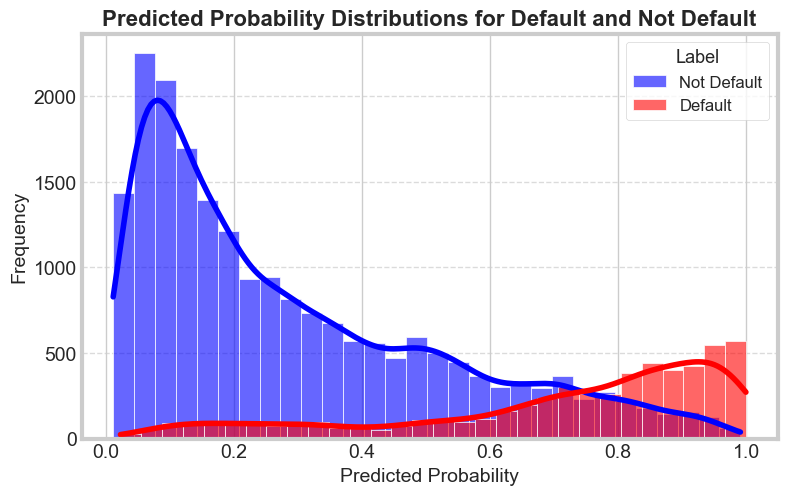

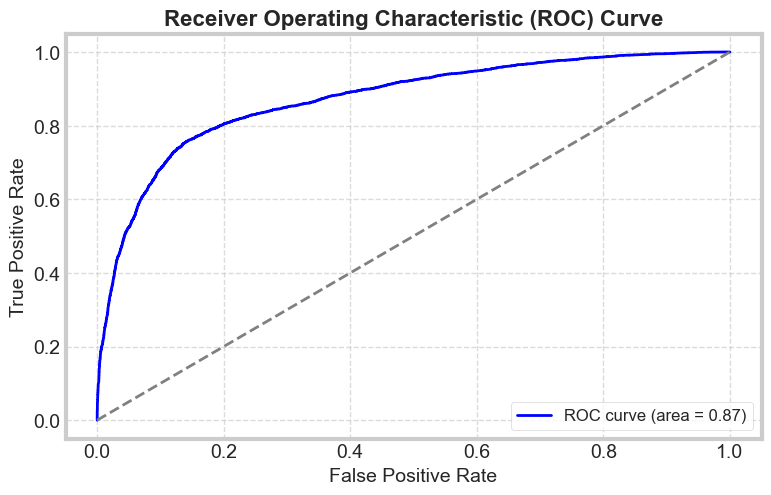

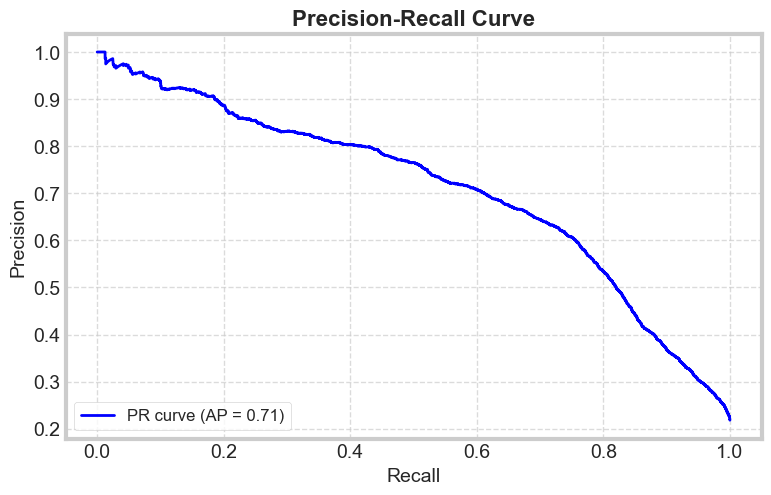

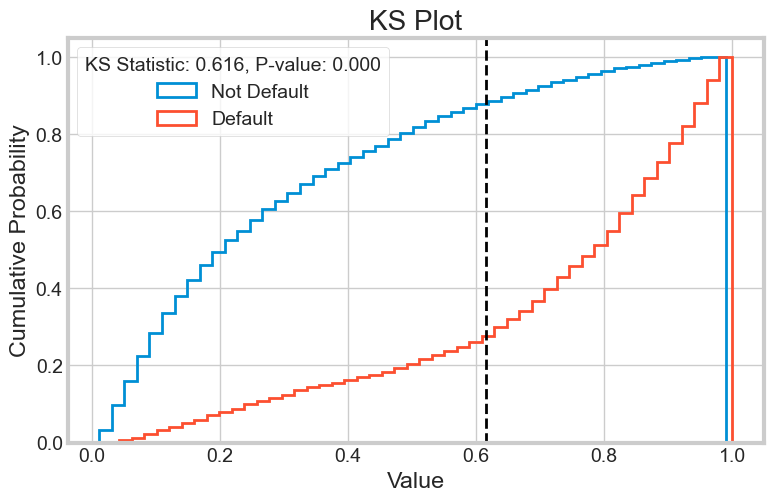

In [47]:
y_pred_proba = model.predict_proba(X_train[selected_features])[:, -1]
plot_predict_proba(y_pred_proba, y_train)
plot_roc_auc_curve(y_pred_proba, y_train)
plot_precision_recall_curve(y_pred_proba, y_train)
plot_ks(y_pred_proba, y_train)

# Evaluate on Testing Data

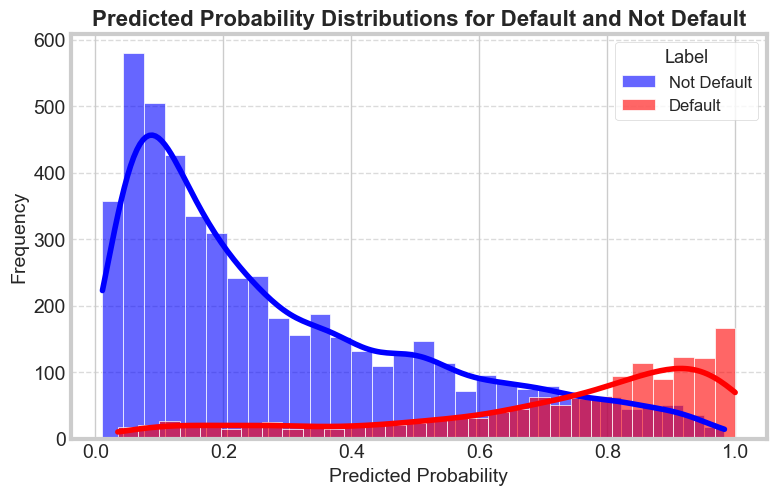

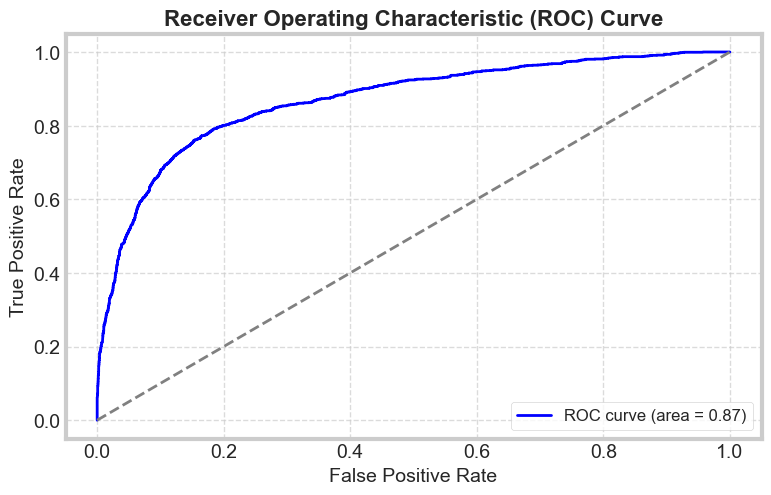

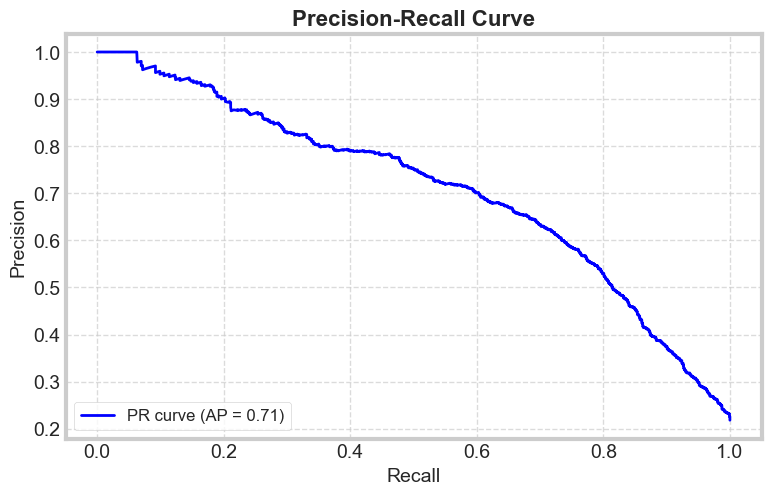

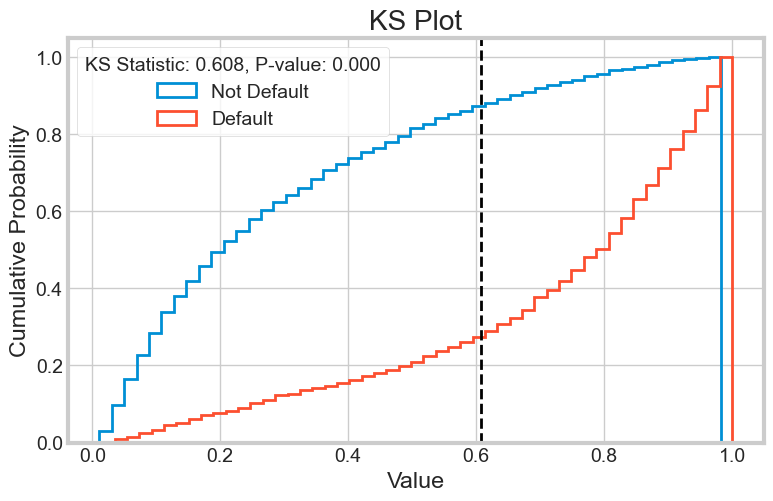

In [48]:
X_test, y_test = test_dummy.drop(columns=["loan_status"]), test_dummy["loan_status"]

y_pred_proba = model.predict_proba(X_test[selected_features])[:, -1]
plot_predict_proba(y_pred_proba, y_test)
plot_roc_auc_curve(y_pred_proba, y_test)
plot_precision_recall_curve(y_pred_proba, y_test)
plot_ks(y_pred_proba, y_test)

# Transform into Scorecard

In [49]:
WOE_df# Define Factor and Offset
factor = 80/np.log(2)
offset = 1000 - factor*np.log(35)

print(f"Offset = {offset:.2f}")
print(f"Factor = {factor:.2f}")

Offset = 589.66
Factor = 115.42


In [50]:
# Define n = number of characteristics
n = len(selected_features)

# Define b0
b0 = model.intercept_[0]

print(f"n = {n}")
print(f"b0 = {b0:.4f}")

n = 8
b0 = -0.0677


In [51]:
model_summary = pd.DataFrame({
    "Feature Name": selected_features,
    "Estimate": model.coef_.reshape(-1)
})

numerical_features = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income'
]

categorical_features =  [
    'person_home_ownership',
    'loan_intent',
    'loan_grade'
]

for feature in model_summary["Feature Name"]:
    if feature in numerical_features:
        bin_feature = feature + "_bin"
    else:
        bin_feature = feature
    model_summary.replace(feature, bin_feature, inplace=True)

scorecards = pd.merge(
    right = WOE_df, 
    left = model_summary,
    how = "left",
    on = ["Feature Name"]
)

In [53]:
# Define beta and WOE
beta = scorecards['Estimate']
WOE = scorecards['WoE']

# Calculate the score point for each attribute
scorecards['Points'] = (offset/n) - factor*((b0/n) + (beta*WOE))
scorecards['Points'] = scorecards['Points'].astype('int')

scorecards.sort_values(by=["Feature Name", "Points"])

Feature Name  Estimate         Feature Value       WoE  Points
32            loan_amnt_bin -0.627387    (14500.0, 35000.0] -0.483470      39
31            loan_amnt_bin -0.627387    (10000.0, 14500.0] -0.021755      73
28            loan_amnt_bin -0.627387     (499.999, 4400.0]  0.043609      77
30            loan_amnt_bin -0.627387     (6800.0, 10000.0]  0.207943      89
29            loan_amnt_bin -0.627387      (4400.0, 6800.0]  0.278812      94
27               loan_grade -1.105416                     G -5.037649    -568
26               loan_grade -1.105416                     F -2.185571    -204
25               loan_grade -1.105416                     E -1.854967    -161
24               loan_grade -1.105416                     D -1.654452    -136
23               loan_grade -1.105416                     C  0.081888      85
22               loan_grade -1.105416                     B  0.348345     119
21               loan_grade -1.105416                     A  0.918329     191
37        loan_int_rate_bin -0.081585        (13.92, 22.48] -1.283691      62
36        loan_int_rate_bin -0.081585        (11.86, 13.92]  0.080689      75
38        loan_int_rate_bin -0.081585               Missing  0.034578      75
35        loan_int_rate_bin -0.081585        (10.25, 11.86]  0.327310      77
34        loan_int_rate_bin -0.081585         (7.51, 10.25]  0.600096      80
33        loan_int_rate_bin -0.081585         (5.419, 7.51]  1.032338      84
15              loan_intent -1.297221     DEBTCONSOLIDATION -0.323396      26
18              loan_intent -1.297221               MEDICAL -0.272080      33
17              loan_intent -1.297221       HOMEIMPROVEMENT -0.230444      40
19              loan_intent -1.297221              PERSONAL  0.097897      89
16              loan_intent -1.297221             EDUCATION  0.277027     116
20              loan_intent -1.297221               VENTURE  0.469865     145
43  loan_percent_income_bin -0.837351          (0.25, 0.83] -1.401235     -60
42  loan_percent_income_bin -0.837351          (0.18, 0.25]  0.162202      90
41  loan_percent_income_bin -0.837351          (0.12, 0.18]  0.441174     117
40  loan_percent_income_bin -0.837351          (0.08, 0.12]  0.682574     140
39  loan_percent_income_bin -0.837351        (-0.001, 0.08]  0.769938     149
14    person_emp_length_bin -0.225638               Missing -0.521681      61
9     person_emp_length_bin -0.225638         (-0.001, 1.0] -0.309268      66
10    person_emp_length_bin -0.225638            (1.0, 3.0] -0.086865      72
11    person_emp_length_bin -0.225638            (3.0, 5.0]  0.115487      77
12    person_emp_length_bin -0.225638            (5.0, 8.0]  0.235009      80
13    person_emp_length_bin -0.225638          (8.0, 123.0]  0.321916      83
6     person_home_ownership -0.734826                 OTHER -0.549400      28
8     person_home_ownership -0.734826                  RENT -0.507538      31
5     person_home_ownership -0.734826              MORTGAGE  0.679659     132
7     person_home_ownership -0.734826                   OWN  1.262009     181
0         person_income_bin -0.922579   (3999.999, 35000.0] -1.007237     -32
1         person_income_bin -0.922579    (35000.0, 48996.0] -0.052875      69
2         person_income_bin -0.922579    (48996.0, 63000.0]  0.175419      93
3         person_income_bin -0.922579    (63000.0, 86000.0]  0.492046     127
4         person_income_bin -0.922579  (86000.0, 6000000.0]  1.030836     184

Credit score cards is useful for intepretability in operations of assessing creditworthines of an applicant.

In [82]:
# Example
sample_input = df.sample(1)

numerical_characteristics = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income'
]

categorical_characteristics =  [
    'person_home_ownership',
    'loan_intent',
    'loan_grade'
]

characteristic_lists = []
value_lists = []
bin_lists = []
woe_lists = []
score_lists = []

for characteristic in sample_input.columns:
    sample_value = sample_input[characteristic].values[0]
    if characteristic in numerical_characteristics:
        filtered_scorecards = scorecards[scorecards["Feature Name"]==characteristic+"_bin"]
        if pd.isna(sample_value):
            row = filtered_scorecards[filtered_scorecards["Feature Value"]=="Missing"]
            print(characteristic, row["Feature Value"], row["Points"])
        else:
            for idx, row in filtered_scorecards.iterrows():
                if isinstance(row["Feature Value"], pd.Interval) and sample_value in row["Feature Value"]:
                    print(characteristic, row["Feature Value"], row["Points"])

    elif characteristic in categorical_characteristics:
        for idx, row in scorecards[scorecards["Feature Name"]==characteristic].iterrows():
            if sample_value == row["Feature Value"]:
                print(characteristic, row["Feature Value"], row["Points"])
        

person_income (48996.0, 63000.0] 93
person_home_ownership MORTGAGE 132
person_emp_length (5.0, 8.0] 80
loan_intent EDUCATION 116
loan_grade B 119
loan_amnt (499.999, 4400.0] 77
loan_int_rate (10.25, 11.86] 77
loan_percent_income (-0.001, 0.08] 149


In [70]:
scorecards

Feature Name  Estimate         Feature Value       WoE  Points
0         person_income_bin -0.922579   (3999.999, 35000.0] -1.007237     -32
1         person_income_bin -0.922579    (35000.0, 48996.0] -0.052875      69
2         person_income_bin -0.922579    (48996.0, 63000.0]  0.175419      93
3         person_income_bin -0.922579    (63000.0, 86000.0]  0.492046     127
4         person_income_bin -0.922579  (86000.0, 6000000.0]  1.030836     184
5     person_home_ownership -0.734826              MORTGAGE  0.679659     132
6     person_home_ownership -0.734826                 OTHER -0.549400      28
7     person_home_ownership -0.734826                   OWN  1.262009     181
8     person_home_ownership -0.734826                  RENT -0.507538      31
9     person_emp_length_bin -0.225638         (-0.001, 1.0] -0.309268      66
10    person_emp_length_bin -0.225638            (1.0, 3.0] -0.086865      72
11    person_emp_length_bin -0.225638            (3.0, 5.0]  0.115487      77
12    person_emp_length_bin -0.225638            (5.0, 8.0]  0.235009      80
13    person_emp_length_bin -0.225638          (8.0, 123.0]  0.321916      83
14    person_emp_length_bin -0.225638               Missing -0.521681      61
15              loan_intent -1.297221     DEBTCONSOLIDATION -0.323396      26
16              loan_intent -1.297221             EDUCATION  0.277027     116
17              loan_intent -1.297221       HOMEIMPROVEMENT -0.230444      40
18              loan_intent -1.297221               MEDICAL -0.272080      33
19              loan_intent -1.297221              PERSONAL  0.097897      89
20              loan_intent -1.297221               VENTURE  0.469865     145
21               loan_grade -1.105416                     A  0.918329     191
22               loan_grade -1.105416                     B  0.348345     119
23               loan_grade -1.105416                     C  0.081888      85
24               loan_grade -1.105416                     D -1.654452    -136
25               loan_grade -1.105416                     E -1.854967    -161
26               loan_grade -1.105416                     F -2.185571    -204
27               loan_grade -1.105416                     G -5.037649    -568
28            loan_amnt_bin -0.627387     (499.999, 4400.0]  0.043609      77
29            loan_amnt_bin -0.627387      (4400.0, 6800.0]  0.278812      94
30            loan_amnt_bin -0.627387     (6800.0, 10000.0]  0.207943      89
31            loan_amnt_bin -0.627387    (10000.0, 14500.0] -0.021755      73
32            loan_amnt_bin -0.627387    (14500.0, 35000.0] -0.483470      39
33        loan_int_rate_bin -0.081585         (5.419, 7.51]  1.032338      84
34        loan_int_rate_bin -0.081585         (7.51, 10.25]  0.600096      80
35        loan_int_rate_bin -0.081585        (10.25, 11.86]  0.327310      77
36        loan_int_rate_bin -0.081585        (11.86, 13.92]  0.080689      75
37        loan_int_rate_bin -0.081585        (13.92, 22.48] -1.283691      62
38        loan_int_rate_bin -0.081585               Missing  0.034578      75
39  loan_percent_income_bin -0.837351        (-0.001, 0.08]  0.769938     149
40  loan_percent_income_bin -0.837351          (0.08, 0.12]  0.682574     140
41  loan_percent_income_bin -0.837351          (0.12, 0.18]  0.441174     117
42  loan_percent_income_bin -0.837351          (0.18, 0.25]  0.162202      90
43  loan_percent_income_bin -0.837351          (0.25, 0.83] -1.401235     -60